# A Study Into Ball in Play Statistics - Premier League 2022/2023 Season
By Sam Grant

---

# Introduction

In this notebook I would like to dive deeper into the statistics behind how long the ball is in play as a percentage of the total game time for each team in the 2022/2023 Premier League Season. This investigation started when I thought the question "Is there a correlation between average amount of time ball is in play and performance" and from there wondered about the different time-wasting tactics that have been in the game for a very long time but seem more prevalent than ever. You can start questioning whether they are worthwhile implementing; for every team or maybe certain particular teams or maybe none at all.

Intuitively and maybe from paying closer attention more recently, it seems clear that time-wasting tactics are a useful tool for many teams. Tactics such as delaying on stoppages (goal kicks, throw-ins, corners, etc), trying to force the ball out of play more or even having a man go down for an injury fake or otherwise. When a lesser team travel to one of the giants you would think it beneficial for the underdogs to try and make sure their opponents see as little of the ball on the field as possible. Usually they cannot do this by outplaying them so they could use these tactics to quell the danger and additionally take the wind out of the home fans and the atmosphere they create, in order to try and scrape a low-scoring narrow victory. Obviously that is quite a specific event where it seems obvious to make use of these tactics but you can extend the situation to playing home instead of away and even swapping out the 2 teams for any others of arbitrary skill level. Assuming at the base case these tactics are useful, when do they stop being if at all?

One more thing to note is that one of the variables in my question is "performance". Unlike the average amount of time the ball is in play, there is no definite metric for performance. The first one that came to mind was points clearly - every team wants as many points as possible as that's how they stack up at the end of the season to order them and decide on champions, european places and relegation. But then why do people say a team over or underperformed based on their points/league position? This implies there is an underlying true performance of a team. I can't tell you exactly what it is (I don't think anyone can) but from my learning on the sports analytics courses I remembered the pythagorean expectation, a metric that uses goals scored and goals conceded to produce a number between 0-1. I think it is a superior performance measure as higher pythagorean expectation means higher goals scored and less conceded so they 'should' be winning more games and hence getting more points, aka a truer measure of a team's performance. From my studies I also know it has a very high correlation with points. Hence, I will using be using it as the main metric for performance alongside points as a control. Additionally, with the sports data revolution expected data is becoming more popular and more widely known so I will use those equivalents in my analysis and visualisations (expected points is taken from an outside source and expected pythagorean expectation will be calculated the same using expected goals and expected goals conceded also from an outside source).

---

## Preparing the Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv("Inplay dataset.csv")
df = df.drop(['Unnamed: 12'], axis = 1)
df.head()

,Team,Av. In play hrs,Av. In play mins,Av. In play secs,Av. In play total secs,% of total,Pts,GF,GA,xPts,xGf,xGa
0,Arsenal,0,54,51,3291,55.4,84,88,43,72.53,71.9,42.0
1,Aston Villa,0,53,29,3209,54.4,61,51,46,54.37,50.2,52.5
2,Bournemouth,0,55,5,3305,56.0,39,37,71,34.73,38.6,63.9
3,Brentford,0,52,7,3127,52.7,59,58,46,58.26,56.8,49.9
4,Brighton,0,55,24,3324,56.1,62,72,53,70.86,73.3,50.2


In [3]:
df['real pyth expctn'] = df['GF']**2/(df['GF']**2+df['GA']**2)
df['expected pyth expctn'] = df['xGf']**2/(df['xGf']**2+df['xGa']**2)
df['path'] = df['Team'] + '.png'
df.head()

,Team,Av. In play hrs,Av. In play mins,Av. In play secs,Av. In play total secs,% of total,Pts,GF,GA,xPts,xGf,xGa,real pyth expctn,expected pyth expctn,path
0,Arsenal,0,54,51,3291,55.4,84,88,43,72.53,71.9,42.0,0.807255,0.745587,Arsenal.png
1,Aston Villa,0,53,29,3209,54.4,61,51,46,54.37,50.2,52.5,0.551410,0.477616,Aston Villa.png
2,Bournemouth,0,55,5,3305,56.0,39,37,71,34.73,38.6,63.9,0.213573,0.267345,Bournemouth.png
3,Brentford,0,52,7,3127,52.7,59,58,46,58.26,56.8,49.9,0.613869,0.564398,Brentford.png
4,Brighton,0,55,24,3324,56.1,62,72,53,70.86,73.3,50.2,0.648567,0.680722,Brighton.png


In [4]:
df1 = df[['Team','% of total','Pts','xPts','real pyth expctn', 'expected pyth expctn','path']]
df1.rename(columns = {"% of total" : "total","real pyth expctn":"RPE","expected pyth expctn":"EPE"}, inplace=True)
df1.head()

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Team,total,Pts,xPts,RPE,EPE,path
0,Arsenal,55.4,84,72.53,0.807255,0.745587,Arsenal.png
1,Aston Villa,54.4,61,54.37,0.551410,0.477616,Aston Villa.png
2,Bournemouth,56.0,39,34.73,0.213573,0.267345,Bournemouth.png
3,Brentford,52.7,59,58.26,0.613869,0.564398,Brentford.png
4,Brighton,56.1,62,70.86,0.648567,0.680722,Brighton.png


---

## Analysis and Visualisations

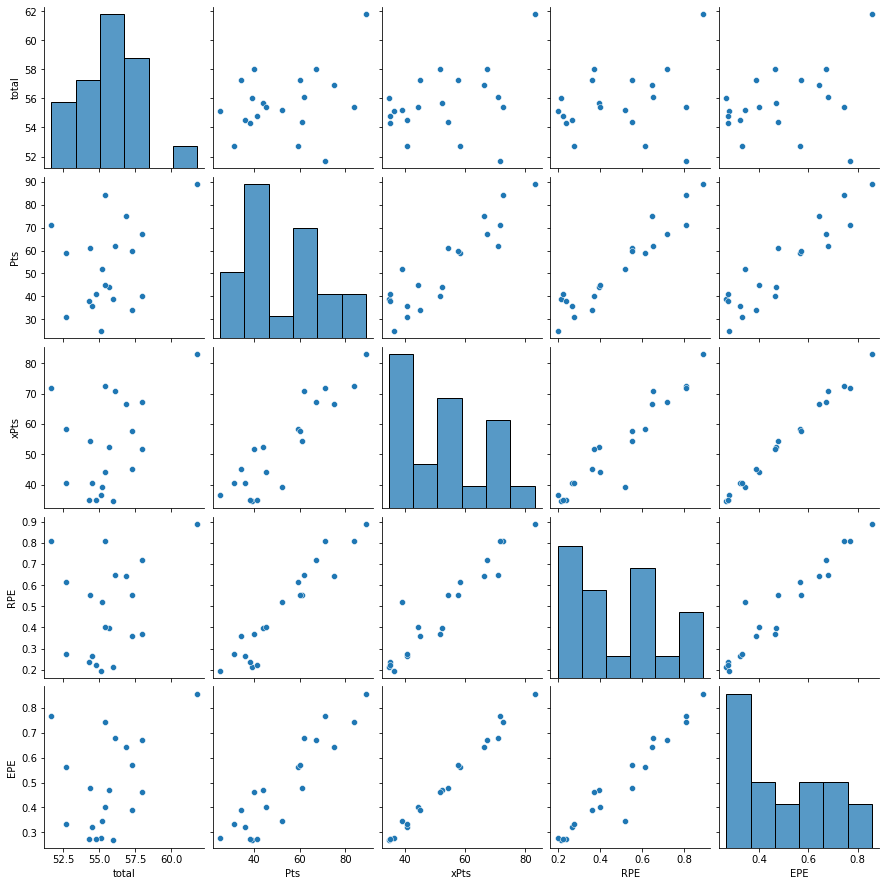

In [5]:
sns.pairplot(df1)
plt.show()

In [6]:
df1.corr()

,total,Pts,xPts,RPE,EPE
total,1.000000,0.331388,0.376116,0.277898,0.346704
Pts,0.331388,1.000000,0.906030,0.953021,0.916548
xPts,0.376116,0.906030,1.000000,0.946415,0.995110
RPE,0.277898,0.953021,0.946415,1.000000,0.961283
EPE,0.346704,0.916548,0.995110,0.961283,1.000000


As expected there is strong correlation between all pairs of Pts, xPts, RPE and EPE. We will now proceed to investigate further the relationship between these variables and in play %. Notably here the correlation between % of total and all other variables is positive so that means when a team plays with the ball in play more, statistically, they play better.

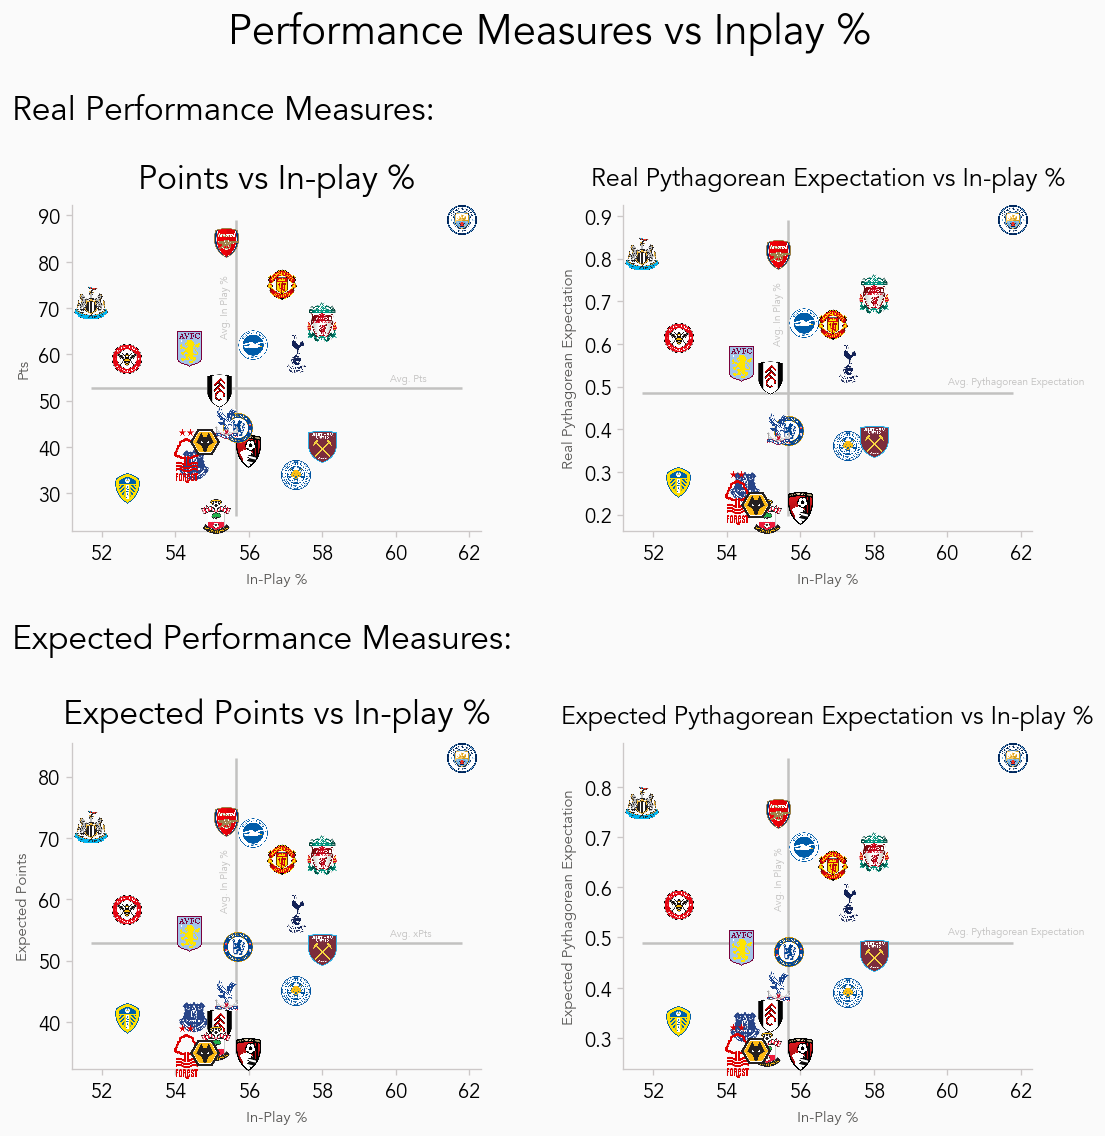

In [7]:
# Set font and background colour
plt.rcParams.update({'font.family':'Avenir'})
bgcol = '#fafafa'

# Create initial plot
fig, axs = plt.subplots(2,2,figsize=(10, 9), dpi=120)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.35,
                    hspace=0.65)
fig.set_facecolor(bgcol)
axs[0,0].set_facecolor(bgcol)
axs[0,0].scatter(df1['total'], df1['Pts'], c=bgcol)

# Change plot spines
axs[0,0].spines['right'].set_visible(False)
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['left'].set_color('#ccc8c8')
axs[0,0].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[0,0].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[0,0].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df1.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['Pts']), frameon=False)
    axs[0,0].add_artist(ab)

# Add average lines
axs[0,0].hlines(df1['Pts'].mean(), df1['total'].min(), df1['total'].max(), color='#c2c1c0')
axs[0,0].vlines(df1['total'].mean(), df1['Pts'].min(), df1['Pts'].max(), color='#c2c1c0')

# Text

## Title
fig.text(.23,1.05,'Performance Measures vs Inplay %',size=25)

## Sub-title
fig.text(.05,.98,'Real Performance Measures:',size=20)

## Title & comment
axs[0,0].set_title('Points vs In-play %',fontsize=20, pad=10)

## Axes titles
axs[0,0].set_ylabel('Pts', size=9, color='#575654',rotation=90)
axs[0,0].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.365,.737,'Avg. Pts', size=6, color='#c2c1c0')
fig.text(.223,.78,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

# Create initial plot
axs[0,1].set_facecolor(bgcol)
axs[0,1].scatter(df1['total'], df1['RPE'], c=bgcol)

# Change plot spines
axs[0,1].spines['right'].set_visible(False)
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['left'].set_color('#ccc8c8')
axs[0,1].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[0,1].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[0,1].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df1.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['RPE']), frameon=False)
    axs[0,1].add_artist(ab)

# Add average lines
axs[0,1].hlines(df1['RPE'].mean(), df1['total'].min(), df1['total'].max(), color='#c2c1c0')
axs[0,1].vlines(df1['total'].mean(), df1['RPE'].min(), df1['RPE'].max(), color='#c2c1c0')

# Text

## Title & comment
axs[0,1].set_title('Real Pythagorean Expectation vs In-play %',fontsize=15, pad=12)

## Axes titles
axs[0,1].set_ylabel('Real Pythagorean Expectation', size=9, color='#575654',rotation=90)
axs[0,1].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.83,.734,'Avg. Pythagorean Expectation', size=6, color='#c2c1c0')
fig.text(.684,.773,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

# Create initial plot
axs[1,0].set_facecolor(bgcol)
axs[1,0].scatter(df1['total'], df1['xPts'], c=bgcol)

# Change plot spines
axs[1,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['left'].set_color('#ccc8c8')
axs[1,0].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[1,0].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[1,0].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df1.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['xPts']), frameon=False)
    axs[1,0].add_artist(ab)

# Add average lines
axs[1,0].hlines(df1['xPts'].mean(), df1['total'].min(), df1['total'].max(), color='#c2c1c0')
axs[1,0].vlines(df1['total'].mean(), df1['xPts'].min(), df1['xPts'].max(), color='#c2c1c0')

# Text

## Sub-title
fig.text(.05,0.49,'Expected Performance Measures:',size=20)

## Title & comment
axs[1,0].set_title('Expected Points vs In-play %',fontsize=20, pad=12)

## Axes titles
axs[1,0].set_ylabel('Expected Points', size=9, color='#575654',rotation=90)
axs[1,0].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.365,.223,'Avg. xPts', size=6, color='#c2c1c0')
fig.text(.223,.248,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

# Create initial plot
axs[1,1].set_facecolor(bgcol)
axs[1,1].scatter(df1['total'], df1['EPE'], c=bgcol)

# Change plot spines
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['left'].set_color('#ccc8c8')
axs[1,1].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[1,1].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[1,1].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df1.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['EPE']), frameon=False)
    axs[1,1].add_artist(ab)

# Add average lines
axs[1,1].hlines(df1['EPE'].mean(), df1['total'].min(), df1['total'].max(), color='#c2c1c0')
axs[1,1].vlines(df1['total'].mean(), df1['EPE'].min(), df1['EPE'].max(), color='#c2c1c0')

# Text

## Title & comment
axs[1,1].set_title('Expected Pythagorean Expectation vs In-play %',fontsize=15, pad =12)

## Axes titles
axs[1,1].set_ylabel('Expected Pythagorean Expectation', size=9, color='#575654',rotation=90)
axs[1,1].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.83,.225,'Avg. Pythagorean Expectation', size=6, color='#c2c1c0')
fig.text(.685,.25,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

plt.show()

At this point in the investigation I would like to pause and discuss observations that have cropped up so far. We could just stop there and draw final conclusions now and be done with it but I believe there is more exploratory analysis to be done first. Also, we could just carry on with it and not make any comments now until we have completely finished the analysis. We are not doing that either because I think it is a good time for a break and a segue into the next section.

The thing about this report so far is that I have thought of more things to add to it as I have been doing it - the initial plan was shorter and originally it would've stopped here but when I drew up these visuals I noticed something that I think is worth exploring more. When looking at the visuals there are handy average lines that separate each plot into 4 quadrants and you can label these quadrants, starting from top left and moving clockwise, as low in play % high performance measure, high in play % high performance measure, high in play % low performance measure and finally low in play % low performance measure. This subsets all the teams into groups, that if you don't notice straight away make sense to us as football fans. Teams challenging for the title or top 4, mid table teams and then teams scrapping for relegation all seem to be bunched. This makes sense based on the variables we are comparing and I think it is interesting how these quadrants force them into such obvious groups. You might be satisfied to say that's that and leave it there, however I don't think this paints the full picture.

Above the visuals, we computed the correlation coefficients between the pairs of variables of each plot. They were all positive which statistically means that as in play % increases aka the ball is in play more, all performance measures increase. This pattern is generally seen in all 4 plots and with the discussion of the quadrants we have further evidence of this trend. The bottom right quadrant, representing high in-play % and low performance measures has the least teams in all 4 plots, suggesting there aren't many teams that play with high in play % and
show low performance. So again are we done? Well no. In case you had forgotten, I would point you to some of the discussion in the introduction section, specifically one point saying "You can start questioning whether they are worthwhile implementing; __for every team or maybe certain particular teams or maybe none at all__." Those visuals and that evidence is looking at it from an overall point of view including every team in the analysis. What if we were to subset the data and look at patterns that emerge when we group teams by an arbitrary criteria we choose like separating the "big 6" clubs. We will have one group of teams who have mostly always been near the top and conventionally play the best football and maybe fight to stay in their position from last season rather than climb much higher. Then we have the rest. Still with a wide variation in team, but all with one united goal - looking up the table and trying to climb as much as possible season on season. Whether thats trying to get further away from relegation, climb into the top half, or try and start challenging for europe they are all trying to level up. These might be the teams that will employ other more innovative tactics to gain an edge instead of buying the best players, the best manager and relying on technical ability like the best of the best do. You can even start to see that if the teams I'm referring to were removed there might be a slightly different pattern. So that is what we will do now.

---

## Subsetting the Data 1, Big 6 vs Non Big 6

In [8]:
df2 = df1.drop([0,5,11,12,13,17])
df2.head()

,Team,total,Pts,xPts,RPE,EPE,path
1,Aston Villa,54.4,61,54.37,0.551410,0.477616,Aston Villa.png
2,Bournemouth,56.0,39,34.73,0.213573,0.267345,Bournemouth.png
3,Brentford,52.7,59,58.26,0.613869,0.564398,Brentford.png
4,Brighton,56.1,62,70.86,0.648567,0.680722,Brighton.png
6,Crystal Palace,55.4,45,44.24,0.399900,0.400324,Crystal Palace.png


In [9]:
df3 = df1.iloc[np.array([0,5,11,12,13,17]),:]
df3

,Team,total,Pts,xPts,RPE,EPE,path
0,Arsenal,55.4,84,72.53,0.807255,0.745587,Arsenal.png
5,Chelsea,55.7,44,52.28,0.395292,0.470614,Chelsea.png
11,Liverpool,58.0,67,67.37,0.718024,0.670446,Liverpool.png
12,Manchester City,61.8,89,83.04,0.890277,0.857365,Manchester City.png
13,Manchester United,56.9,75,66.40,0.645310,0.643409,Manchester United.png
17,Tottenham,57.3,60,57.60,0.552486,0.568957,Tottenham.png


---

## Analysis and Visualisations, After First Subsetting - Big 6

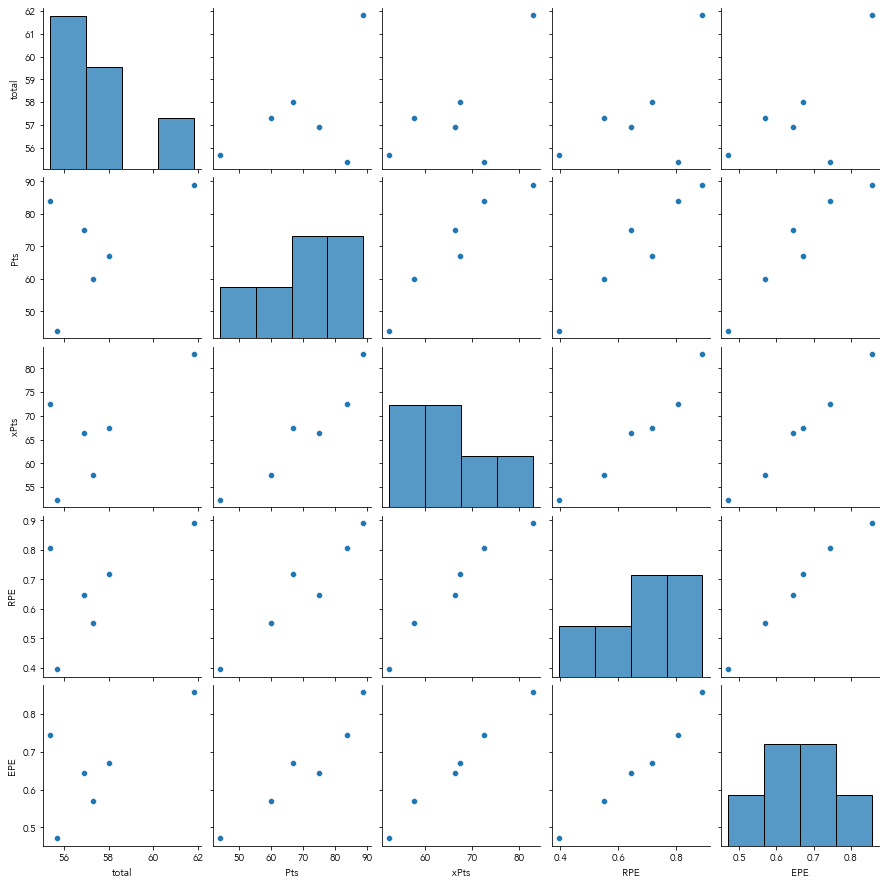

In [10]:
sns.pairplot(df3)
plt.show()

In [11]:
df3.corr()

,total,Pts,xPts,RPE,EPE
total,1.000000,0.504919,0.685440,0.588195,0.668876
Pts,0.504919,1.000000,0.949653,0.958585,0.957486
xPts,0.685440,0.949653,1.000000,0.974166,0.994780
RPE,0.588195,0.958585,0.974166,1.000000,0.987421
EPE,0.668876,0.957486,0.994780,0.987421,1.000000


In this case, there is again positive correlation between in play % and our performance measures, however now this value has increased meaning in this subset of the data the trend is shown clearer.

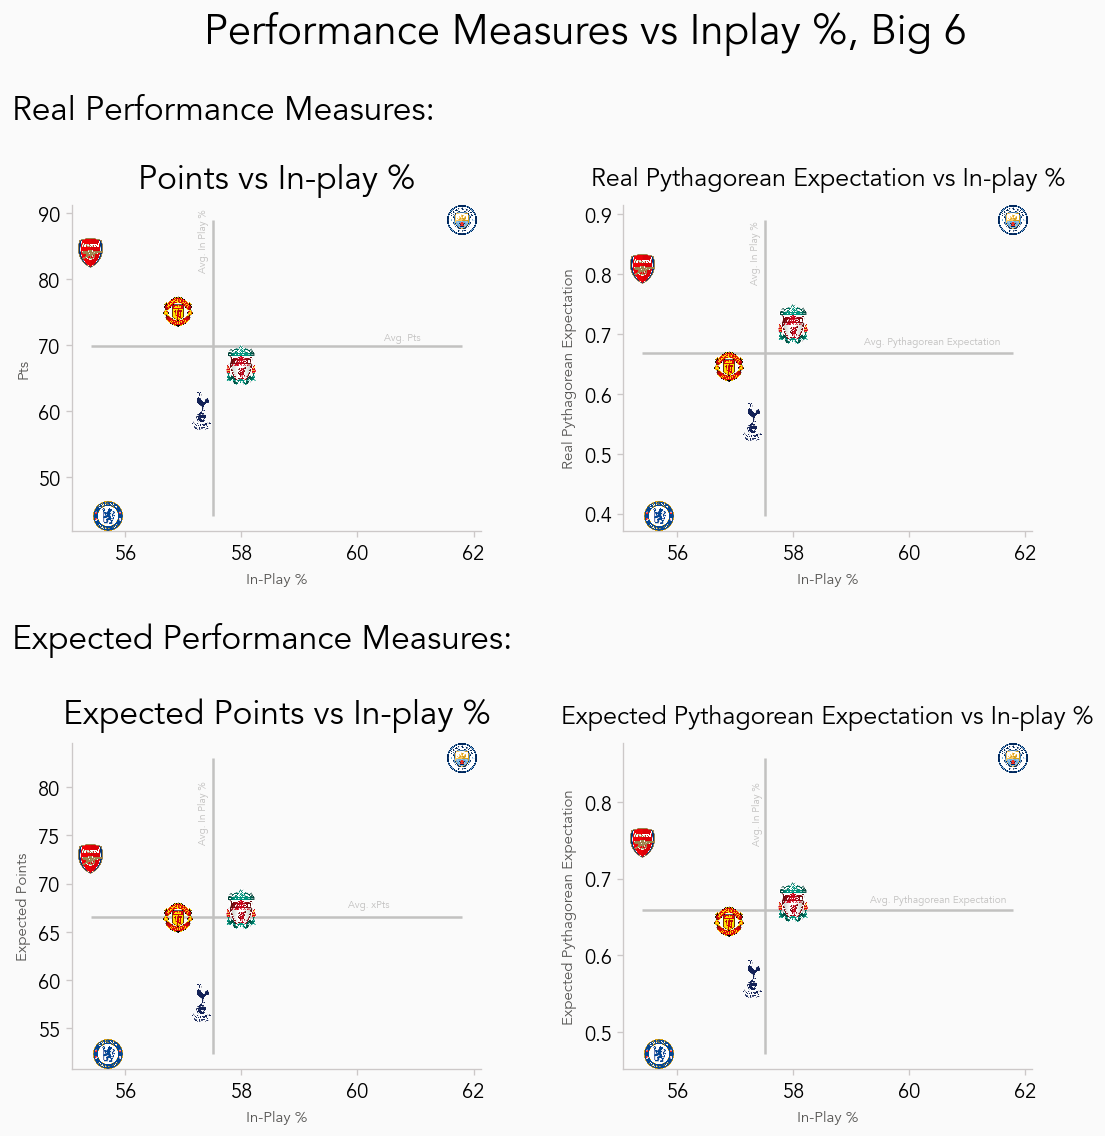

In [12]:
# Create initial plot
fig, axs = plt.subplots(2,2,figsize=(10, 9), dpi=120)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.35,
                    hspace=0.65)
fig.set_facecolor(bgcol)
axs[0,0].set_facecolor(bgcol)
axs[0,0].scatter(df3['total'], df3['Pts'], c=bgcol)

# Change plot spines
axs[0,0].spines['right'].set_visible(False)
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['left'].set_color('#ccc8c8')
axs[0,0].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[0,0].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[0,0].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df3.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['Pts']), frameon=False)
    axs[0,0].add_artist(ab)

# Add average lines
axs[0,0].hlines(df3['Pts'].mean(), df3['total'].min(), df3['total'].max(), color='#c2c1c0')
axs[0,0].vlines(df3['total'].mean(), df3['Pts'].min(), df3['Pts'].max(), color='#c2c1c0')

# Text

## Title
fig.text(.21,1.05,'Performance Measures vs Inplay %, Big 6',size=25)

## Sub-title
fig.text(.05,.98,'Real Performance Measures:',size=20)

## Title & comment
axs[0,0].set_title('Points vs In-play %',fontsize=20, pad=10)

## Axes titles
axs[0,0].set_ylabel('Pts', size=9, color='#575654',rotation=90)
axs[0,0].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.36,.775,'Avg. Pts', size=6, color='#c2c1c0')
fig.text(.205,.841,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

# Create initial plot
axs[0,1].set_facecolor(bgcol)
axs[0,1].scatter(df3['total'], df3['RPE'], c=bgcol)

# Change plot spines
axs[0,1].spines['right'].set_visible(False)
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['left'].set_color('#ccc8c8')
axs[0,1].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[0,1].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[0,1].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df3.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['RPE']), frameon=False)
    axs[0,1].add_artist(ab)

# Add average lines
axs[0,1].hlines(df3['RPE'].mean(), df3['total'].min(), df3['total'].max(), color='#c2c1c0')
axs[0,1].vlines(df3['total'].mean(), df3['RPE'].min(), df3['RPE'].max(), color='#c2c1c0')

# Text

## Title & comment
axs[0,1].set_title('Real Pythagorean Expectation vs In-play %',fontsize=15, pad=12)

## Axes titles
axs[0,1].set_ylabel('Real Pythagorean Expectation', size=9, color='#575654',rotation=90)
axs[0,1].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.76,.771,'Avg. Pythagorean Expectation', size=6, color='#c2c1c0')
fig.text(.665,.83,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

# Create initial plot
axs[1,0].set_facecolor(bgcol)
axs[1,0].scatter(df3['total'], df3['xPts'], c=bgcol)

# Change plot spines
axs[1,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['left'].set_color('#ccc8c8')
axs[1,0].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[1,0].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[1,0].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df3.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['xPts']), frameon=False)
    axs[1,0].add_artist(ab)

# Add average lines
axs[1,0].hlines(df3['xPts'].mean(), df3['total'].min(), df3['total'].max(), color='#c2c1c0')
axs[1,0].vlines(df3['total'].mean(), df3['xPts'].min(), df3['xPts'].max(), color='#c2c1c0')

# Text

## Sub-title
fig.text(.05,0.49,'Expected Performance Measures:',size=20)

## Title & comment
axs[1,0].set_title('Expected Points vs In-play %',fontsize=20, pad=12)

## Axes titles
axs[1,0].set_ylabel('Expected Points', size=9, color='#575654',rotation=90)
axs[1,0].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.33,.25,'Avg. xPts', size=6, color='#c2c1c0')
fig.text(.205,.311,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

# Create initial plot
axs[1,1].set_facecolor(bgcol)
axs[1,1].scatter(df3['total'], df3['EPE'], c=bgcol)

# Change plot spines
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['left'].set_color('#ccc8c8')
axs[1,1].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[1,1].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[1,1].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df3.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['EPE']), frameon=False)
    axs[1,1].add_artist(ab)

# Add average lines
axs[1,1].hlines(df3['EPE'].mean(), df3['total'].min(), df3['total'].max(), color='#c2c1c0')
axs[1,1].vlines(df3['total'].mean(), df3['EPE'].min(), df3['EPE'].max(), color='#c2c1c0')

# Text

## Title & comment
axs[1,1].set_title('Expected Pythagorean Expectation vs In-play %',fontsize=15, pad =12)

## Axes titles
axs[1,1].set_ylabel('Expected Pythagorean Expectation', size=9, color='#575654',rotation=90)
axs[1,1].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.765,.255,'Avg. Pythagorean Expectation', size=6, color='#c2c1c0')
fig.text(.667,.31,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

plt.show()

Consistent with what we saw above, in all 4 plots there is an upward trend in that having a higher in-play % means you statistically have higher performance measures. However, it is interesting to note here that removing/ignoring one team (Manchester City) leaves us with 4 plots that don't have a clear trend between them. We will touch on this more below when we will see this demonstrated even further in the other subset of data leftover.

It is also worth nothing at this point, that you should try and keep every piece of data and not just remove any because it looks out of place without investigating further - especially in such a small data set, where removing any data will have a larger effect compared to a bigger data set. This idea will be taken into consideration in the final conclusion and overall judgement of this report.

---

## Analysis and Visualisations, After First Subsetting - non Big 6

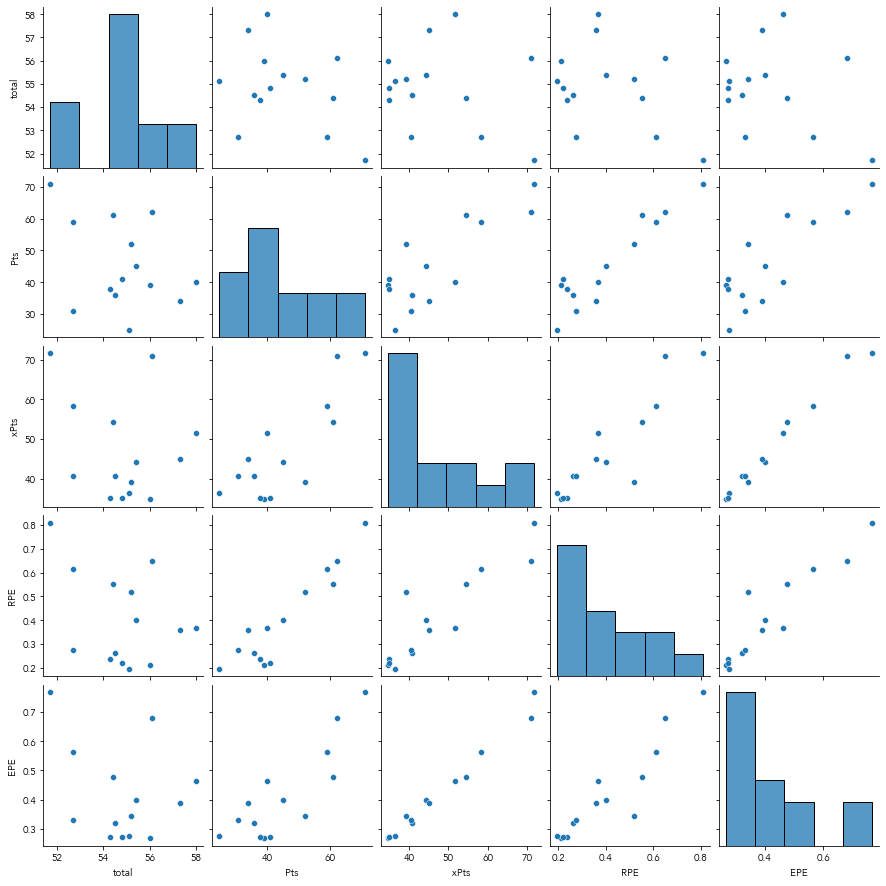

In [13]:
sns.pairplot(df2)
plt.show()

In [14]:
df2.corr()

,total,Pts,xPts,RPE,EPE
total,1.000000,-0.369419,-0.222256,-0.348473,-0.275172
Pts,-0.369419,1.000000,0.820273,0.934020,0.843385
xPts,-0.222256,0.820273,1.000000,0.906436,0.991479
RPE,-0.348473,0.934020,0.906436,1.000000,0.932132
EPE,-0.275172,0.843385,0.991479,0.932132,1.000000


Here the correlation between % of total and all other variables is negative so that means when a team plays with the ball in play more, statistically, they play worse. Now let's do the same visualisations again.

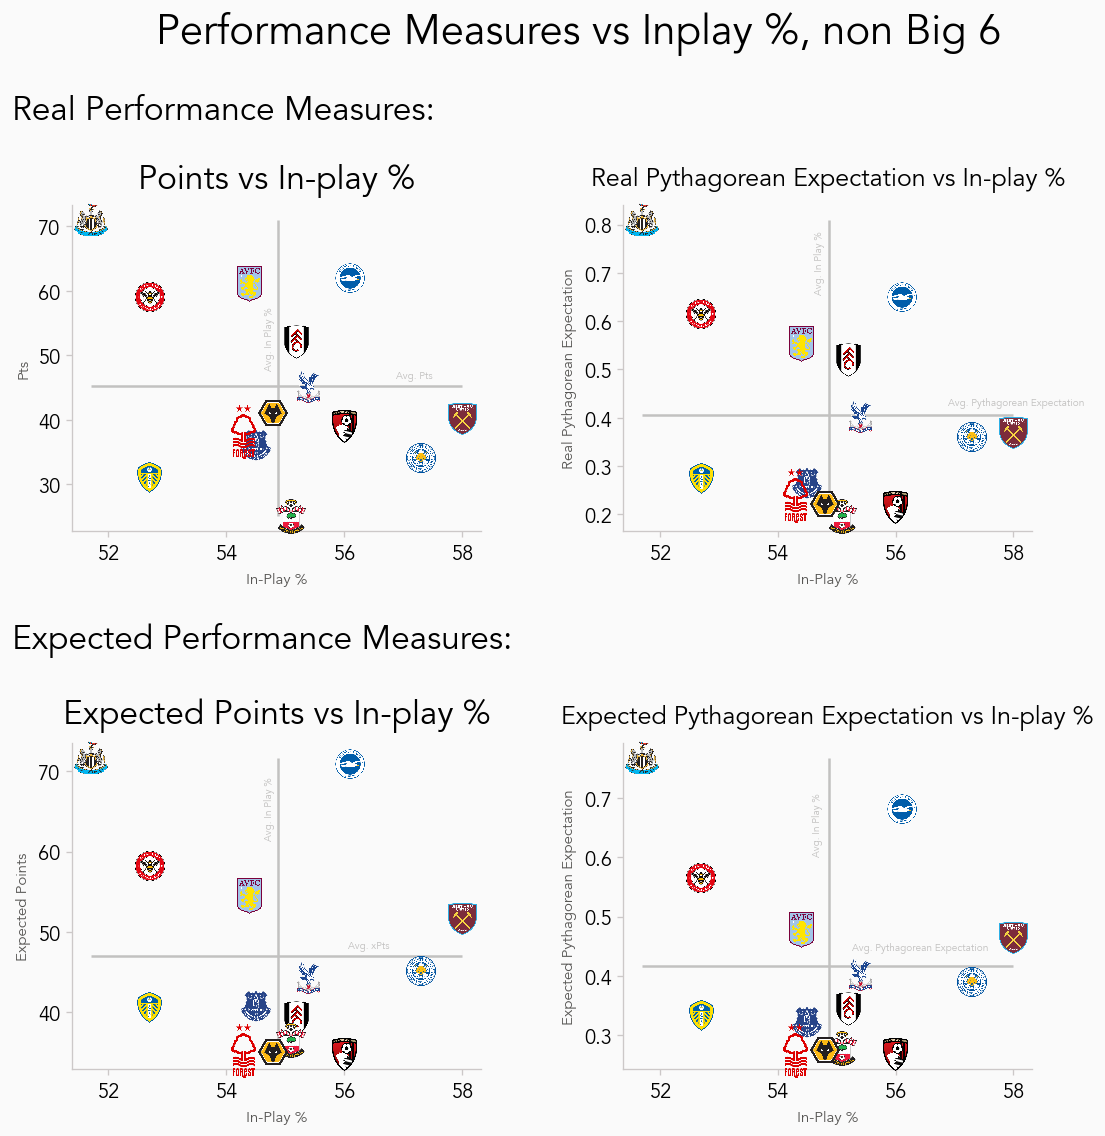

In [15]:
# Create initial plot
fig, axs = plt.subplots(2,2,figsize=(10, 9), dpi=120)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.35,
                    hspace=0.65)
fig.set_facecolor(bgcol)
axs[0,0].set_facecolor(bgcol)
axs[0,0].scatter(df2['total'], df2['Pts'], c=bgcol)

# Change plot spines
axs[0,0].spines['right'].set_visible(False)
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['left'].set_color('#ccc8c8')
axs[0,0].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[0,0].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[0,0].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df2.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['Pts']), frameon=False)
    axs[0,0].add_artist(ab)

# Add average lines
axs[0,0].hlines(df2['Pts'].mean(), df2['total'].min(), df2['total'].max(), color='#c2c1c0')
axs[0,0].vlines(df2['total'].mean(), df2['Pts'].min(), df2['Pts'].max(), color='#c2c1c0')

# Text

## Title
fig.text(.17,1.05,'Performance Measures vs Inplay %, non Big 6',size=25)

## Sub-title
fig.text(.05,.98,'Real Performance Measures:',size=20)

## Title & comment
axs[0,0].set_title('Points vs In-play %',fontsize=20, pad=10)

## Axes titles
axs[0,0].set_ylabel('Pts', size=9, color='#575654',rotation=90)
axs[0,0].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.37,.74,'Avg. Pts', size=6, color='#c2c1c0')
fig.text(.26,.75,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

# Create initial plot
axs[0,1].set_facecolor(bgcol)
axs[0,1].scatter(df2['total'], df2['RPE'], c=bgcol)

# Change plot spines
axs[0,1].spines['right'].set_visible(False)
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['left'].set_color('#ccc8c8')
axs[0,1].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[0,1].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[0,1].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df2.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['RPE']), frameon=False)
    axs[0,1].add_artist(ab)

# Add average lines
axs[0,1].hlines(df2['RPE'].mean(), df2['total'].min(), df2['total'].max(), color='#c2c1c0')
axs[0,1].vlines(df2['total'].mean(), df2['RPE'].min(), df2['RPE'].max(), color='#c2c1c0')

# Text

## Title & comment
axs[0,1].set_title('Real Pythagorean Expectation vs In-play %',fontsize=15, pad=12)

## Axes titles
axs[0,1].set_ylabel('Real Pythagorean Expectation', size=9, color='#575654',rotation=90)
axs[0,1].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.83,.715,'Avg. Pythagorean Expectation', size=6, color='#c2c1c0')
fig.text(.718,.82,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

# Create initial plot
axs[1,0].set_facecolor(bgcol)
axs[1,0].scatter(df2['total'], df2['xPts'], c=bgcol)

# Change plot spines
axs[1,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['left'].set_color('#ccc8c8')
axs[1,0].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[1,0].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[1,0].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df2.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['xPts']), frameon=False)
    axs[1,0].add_artist(ab)

# Add average lines
axs[1,0].hlines(df2['xPts'].mean(), df2['total'].min(), df2['total'].max(), color='#c2c1c0')
axs[1,0].vlines(df2['total'].mean(), df2['xPts'].min(), df2['xPts'].max(), color='#c2c1c0')

# Text

## Sub-title
fig.text(.05,0.49,'Expected Performance Measures:',size=20)

## Title & comment
axs[1,0].set_title('Expected Points vs In-play %',fontsize=20, pad=12)

## Axes titles
axs[1,0].set_ylabel('Expected Points', size=9, color='#575654',rotation=90)
axs[1,0].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.33,.212,'Avg. xPts', size=6, color='#c2c1c0')
fig.text(.26,.315,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

# Create initial plot
axs[1,1].set_facecolor(bgcol)
axs[1,1].scatter(df2['total'], df2['EPE'], c=bgcol)

# Change plot spines
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['left'].set_color('#ccc8c8')
axs[1,1].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[1,1].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[1,1].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df2.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['EPE']), frameon=False)
    axs[1,1].add_artist(ab)

# Add average lines
axs[1,1].hlines(df2['EPE'].mean(), df2['total'].min(), df2['total'].max(), color='#c2c1c0')
axs[1,1].vlines(df2['total'].mean(), df2['EPE'].min(), df2['EPE'].max(), color='#c2c1c0')

# Text

## Title & comment
axs[1,1].set_title('Expected Pythagorean Expectation vs In-play %',fontsize=15, pad =12)

## Axes titles
axs[1,1].set_ylabel('Expected Pythagorean Expectation', size=9, color='#575654',rotation=90)
axs[1,1].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.75,.21,'Avg. Pythagorean Expectation', size=6, color='#c2c1c0')
fig.text(.717,.3,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

plt.show()

Despite the negative correlation coefficient between each pair of variables, I found it surprising that the downward trends are not so obvious. Relating to the discussion above about Manchester City the team of interest seems to be Newcastle United in that ignoring this leaves with you plots with no clear picture whatsoever so that is what we will proceed to do next. The reason I am doing it here instead of above is as mentioned the effect of removing data is lessened in a larger data set - what we have here.

Further to this on the topic of outliers, I am not simply ignoring and discarding these pieces of data but at each section of the report I am looking at the subset of the data I have arbitrarily chosen and seeing what emerges. Then you can do some inference on what you see __on those teams included in that subset__. For example, in the section we are finishing we found statistically that as in-play % increases, performance worsens and in the next section what we find will be either the same conclusion or different, on a different group of teams. Then, when it all comes together at the end we will weigh up both of these findings and make an overall conclusion that takes them into account.

---

## Subsetting the Data 1, Removing Newcastle

In [16]:
df4 = df2.drop(14)
df4

,Team,total,Pts,xPts,RPE,EPE,path
1,Aston Villa,54.4,61,54.37,0.551410,0.477616,Aston Villa.png
2,Bournemouth,56.0,39,34.73,0.213573,0.267345,Bournemouth.png
3,Brentford,52.7,59,58.26,0.613869,0.564398,Brentford.png
4,Brighton,56.1,62,70.86,0.648567,0.680722,Brighton.png
6,Crystal Palace,55.4,45,44.24,0.399900,0.400324,Crystal Palace.png
7,Everton,54.5,36,40.71,0.262429,0.321256,Everton.png
8,Fulham,55.2,52,39.24,0.518512,0.343994,Fulham.png
9,Leeds United,52.7,31,40.58,0.274678,0.332233,Leeds United.png
10,Leicester City,57.3,34,45.07,0.360000,0.389117,Leicester City.png
15,Nottingham Forest,54.3,38,35.05,0.237970,0.272583,Nottingham Forest.png


---

## Analysis and Visualisations, After Removing Newcastle

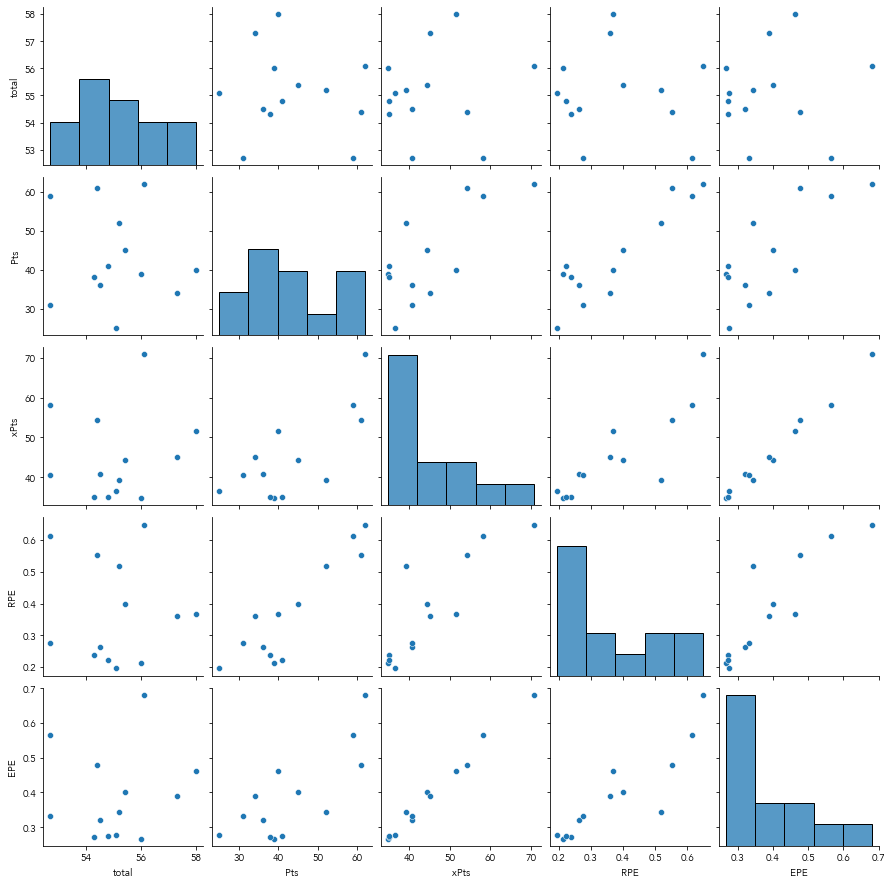

In [17]:
sns.pairplot(df4)
plt.show()

In [18]:
df4.corr()

,total,Pts,xPts,RPE,EPE
total,1.000000,-0.115135,0.104173,-0.045814,0.092848
Pts,-0.115135,1.000000,0.741013,0.904911,0.767357
xPts,0.104173,0.741013,1.000000,0.860248,0.993854
RPE,-0.045814,0.904911,0.860248,1.000000,0.891146
EPE,0.092848,0.767357,0.993854,0.891146,1.000000


Interestingly here, the correlation coefficients between the pairs of variables differ in sign. Meaning statistically, increasing in play % makes some performance measures increase and others decrease. Importantly however, the coefficients all have low absolute values meaning that the trend is not particuarly clear.

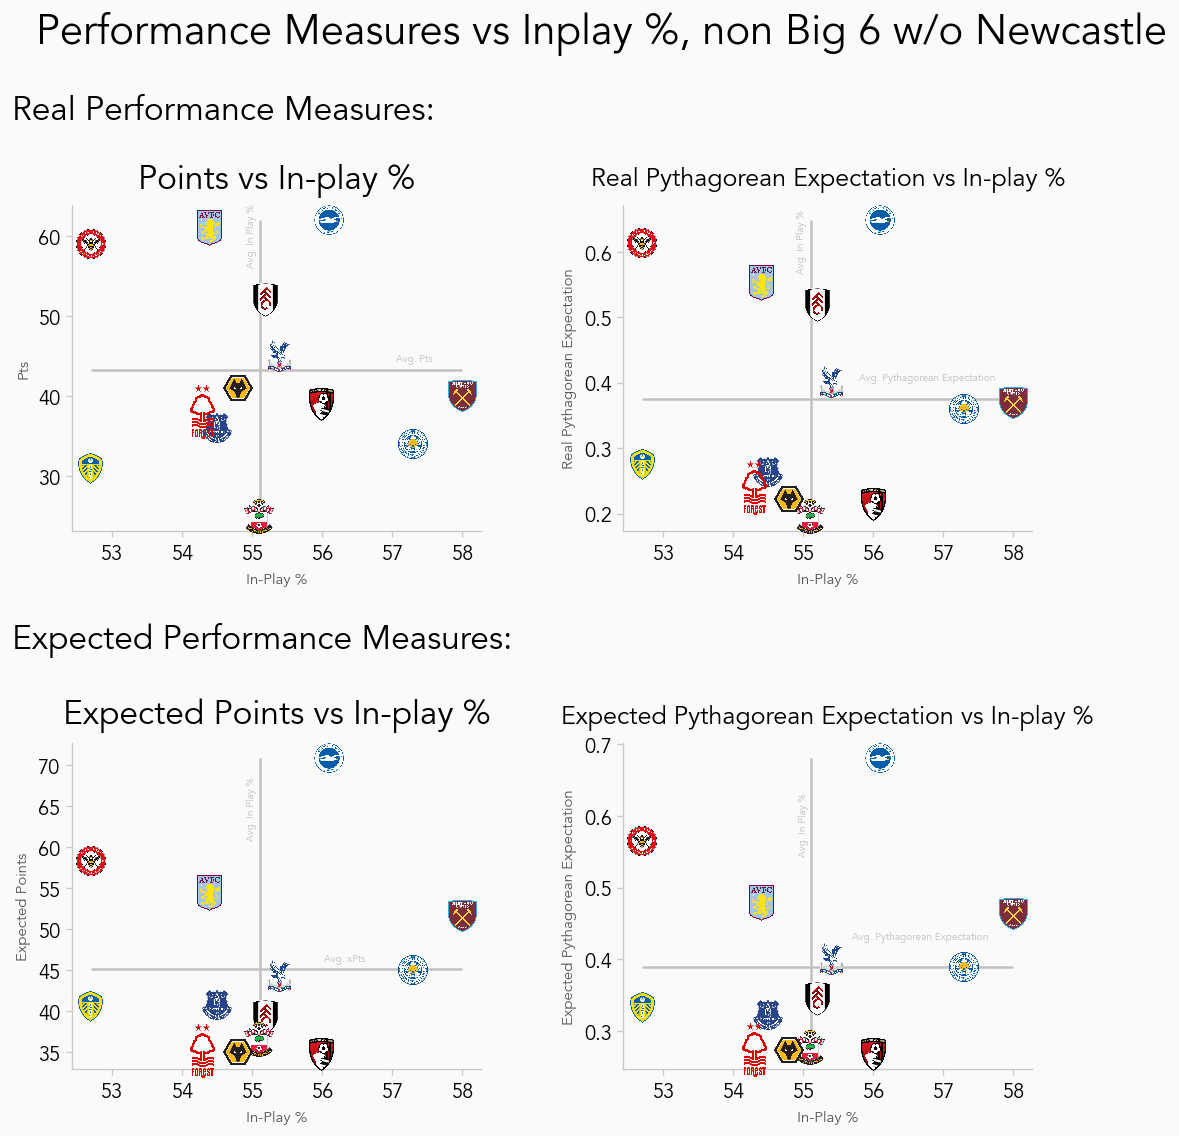

In [19]:
# Create initial plot
fig, axs = plt.subplots(2,2,figsize=(10, 9), dpi=120)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.35,
                    hspace=0.65)
fig.set_facecolor(bgcol)
axs[0,0].set_facecolor(bgcol)
axs[0,0].scatter(df4['total'], df4['Pts'], c=bgcol)

# Change plot spines
axs[0,0].spines['right'].set_visible(False)
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['left'].set_color('#ccc8c8')
axs[0,0].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[0,0].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[0,0].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df4.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['Pts']), frameon=False)
    axs[0,0].add_artist(ab)

# Add average lines
axs[0,0].hlines(df4['Pts'].mean(), df4['total'].min(), df4['total'].max(), color='#c2c1c0')
axs[0,0].vlines(df4['total'].mean(), df4['Pts'].min(), df4['Pts'].max(), color='#c2c1c0')

# Text

## Title
fig.text(.07,1.05,'Performance Measures vs Inplay %, non Big 6 w/o Newcastle',size=25)

## Sub-title
fig.text(.05,.98,'Real Performance Measures:',size=20)

## Title & comment
axs[0,0].set_title('Points vs In-play %',fontsize=20, pad=10)

## Axes titles
axs[0,0].set_ylabel('Pts', size=9, color='#575654',rotation=90)
axs[0,0].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.37,.756,'Avg. Pts', size=6, color='#c2c1c0')
fig.text(.245,.845,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

# Create initial plot
axs[0,1].set_facecolor(bgcol)
axs[0,1].scatter(df4['total'], df4['RPE'], c=bgcol)

# Change plot spines
axs[0,1].spines['right'].set_visible(False)
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['left'].set_color('#ccc8c8')
axs[0,1].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[0,1].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[0,1].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df4.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['RPE']), frameon=False)
    axs[0,1].add_artist(ab)

# Add average lines
axs[0,1].hlines(df4['RPE'].mean(), df4['total'].min(), df4['total'].max(), color='#c2c1c0')
axs[0,1].vlines(df4['total'].mean(), df4['RPE'].min(), df4['RPE'].max(), color='#c2c1c0')

# Text

## Title & comment
axs[0,1].set_title('Real Pythagorean Expectation vs In-play %',fontsize=15, pad=12)

## Axes titles
axs[0,1].set_ylabel('Real Pythagorean Expectation', size=9, color='#575654',rotation=90)
axs[0,1].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.756,.738,'Avg. Pythagorean Expectation', size=6, color='#c2c1c0')
fig.text(.703,.84,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

# Create initial plot
axs[1,0].set_facecolor(bgcol)
axs[1,0].scatter(df4['total'], df4['xPts'], c=bgcol)

# Change plot spines
axs[1,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['left'].set_color('#ccc8c8')
axs[1,0].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[1,0].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[1,0].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df4.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['xPts']), frameon=False)
    axs[1,0].add_artist(ab)

# Add average lines
axs[1,0].hlines(df4['xPts'].mean(), df4['total'].min(), df4['total'].max(), color='#c2c1c0')
axs[1,0].vlines(df4['total'].mean(), df4['xPts'].min(), df4['xPts'].max(), color='#c2c1c0')

# Text

## Sub-title
fig.text(.05,0.49,'Expected Performance Measures:',size=20)

## Title & comment
axs[1,0].set_title('Expected Points vs In-play %',fontsize=20, pad=12)

## Axes titles
axs[1,0].set_ylabel('Expected Points', size=9, color='#575654',rotation=90)
axs[1,0].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.31,.2,'Avg. xPts', size=6, color='#c2c1c0')
fig.text(.245,.315,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

# Create initial plot
axs[1,1].set_facecolor(bgcol)
axs[1,1].scatter(df4['total'], df4['EPE'], c=bgcol)

# Change plot spines
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['left'].set_color('#ccc8c8')
axs[1,1].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[1,1].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[1,1].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df4.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['EPE']), frameon=False)
    axs[1,1].add_artist(ab)

# Add average lines
axs[1,1].hlines(df4['EPE'].mean(), df4['total'].min(), df4['total'].max(), color='#c2c1c0')
axs[1,1].vlines(df4['total'].mean(), df4['EPE'].min(), df4['EPE'].max(), color='#c2c1c0')

# Text

## Title & comment
axs[1,1].set_title('Expected Pythagorean Expectation vs In-play %',fontsize=15, pad =12)

## Axes titles
axs[1,1].set_ylabel('Expected Pythagorean Expectation', size=9, color='#575654',rotation=90)
axs[1,1].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.75,.22,'Avg. Pythagorean Expectation', size=6, color='#c2c1c0')
fig.text(.705,.3,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

plt.show()

In these plots, as suggested by the correlation coefficients, there is no clear trend. Meaning statistically, in-play % is not a good indicator of performance - they are not linked. To put it into a practical context, these teams do not benefit from time-wasting tactics and trying to keep the ball out of play as it does not improve their performance, hence they are not worthwhile implementing.

Going all the way back to the first visuals where we included all the teams, I thought I noticed that you can split the teams into 2 groups by a diagonal such that one group has a clear downward trend and the other a clear upward trend. It also seemed to be generally the teams with lower in play % in the group with the downward trend and higher in play % in the group with the upward trend. So in the next section we will subset the data by ordering in play %, splitting it in half and seeing what we find.

---

## Subsetting the Data 2, Half and Half

In [20]:
df5 = df1.copy()
df5 = df5.sort_values('total', ascending =True)
df5.head()

,Team,total,Pts,xPts,RPE,EPE,path
14,Newcastle United,51.7,71,71.67,0.809382,0.767754,Newcastle United.png
9,Leeds United,52.7,31,40.58,0.274678,0.332233,Leeds United.png
3,Brentford,52.7,59,58.26,0.613869,0.564398,Brentford.png
15,Nottingham Forest,54.3,38,35.05,0.237970,0.272583,Nottingham Forest.png
1,Aston Villa,54.4,61,54.37,0.551410,0.477616,Aston Villa.png


In [21]:
df6 = df5[0:10]
df6.head()

,Team,total,Pts,xPts,RPE,EPE,path
14,Newcastle United,51.7,71,71.67,0.809382,0.767754,Newcastle United.png
9,Leeds United,52.7,31,40.58,0.274678,0.332233,Leeds United.png
3,Brentford,52.7,59,58.26,0.613869,0.564398,Brentford.png
15,Nottingham Forest,54.3,38,35.05,0.237970,0.272583,Nottingham Forest.png
1,Aston Villa,54.4,61,54.37,0.551410,0.477616,Aston Villa.png


In [22]:
df7 = df5[10:]
df7.head()

,Team,total,Pts,xPts,RPE,EPE,path
0,Arsenal,55.4,84,72.53,0.807255,0.745587,Arsenal.png
5,Chelsea,55.7,44,52.28,0.395292,0.470614,Chelsea.png
2,Bournemouth,56.0,39,34.73,0.213573,0.267345,Bournemouth.png
4,Brighton,56.1,62,70.86,0.648567,0.680722,Brighton.png
13,Manchester United,56.9,75,66.40,0.645310,0.643409,Manchester United.png


---

## Analysis and Visualisations, After Second Subsetting - Lower Half

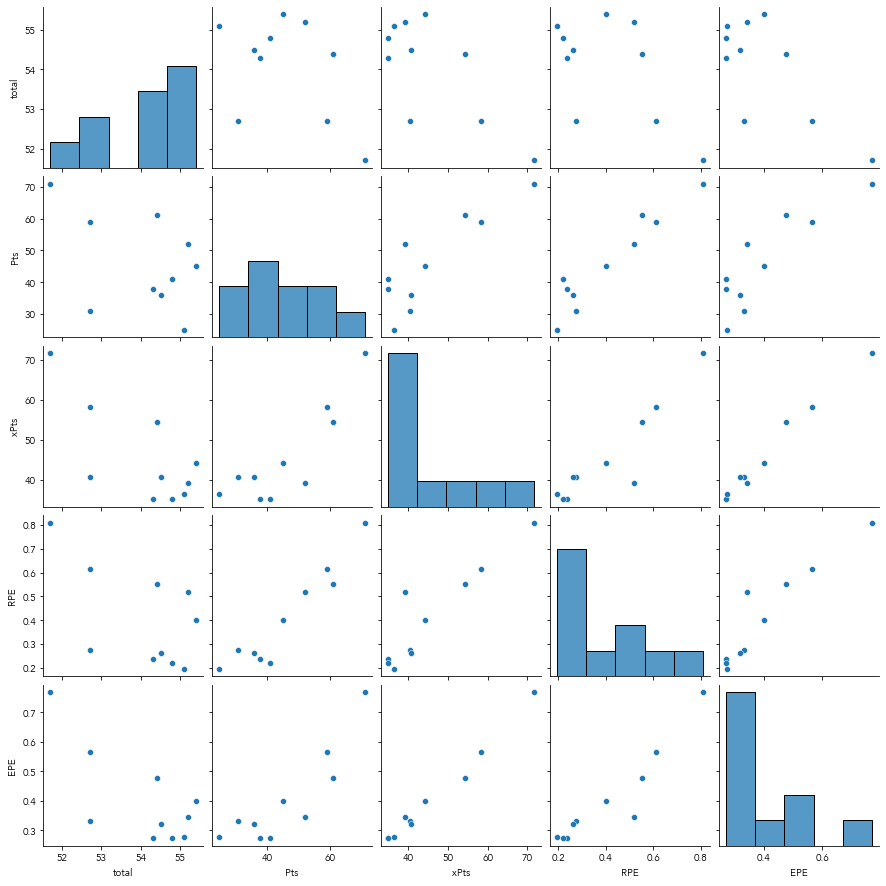

In [23]:
sns.pairplot(df6)
plt.show()

In [24]:
df6.corr()

,total,Pts,xPts,RPE,EPE
total,1.000000,-0.468035,-0.727906,-0.573135,-0.729376
Pts,-0.468035,1.000000,0.860654,0.950369,0.869572
xPts,-0.727906,0.860654,1.000000,0.922163,0.992257
RPE,-0.573135,0.950369,0.922163,1.000000,0.937291
EPE,-0.729376,0.869572,0.992257,0.937291,1.000000


Here, again we see negative correlation coefficients and at this point we all know what that means (statistically of course), but this time the absolute values of the coefficients are larger, meaning the trend should be clearer.

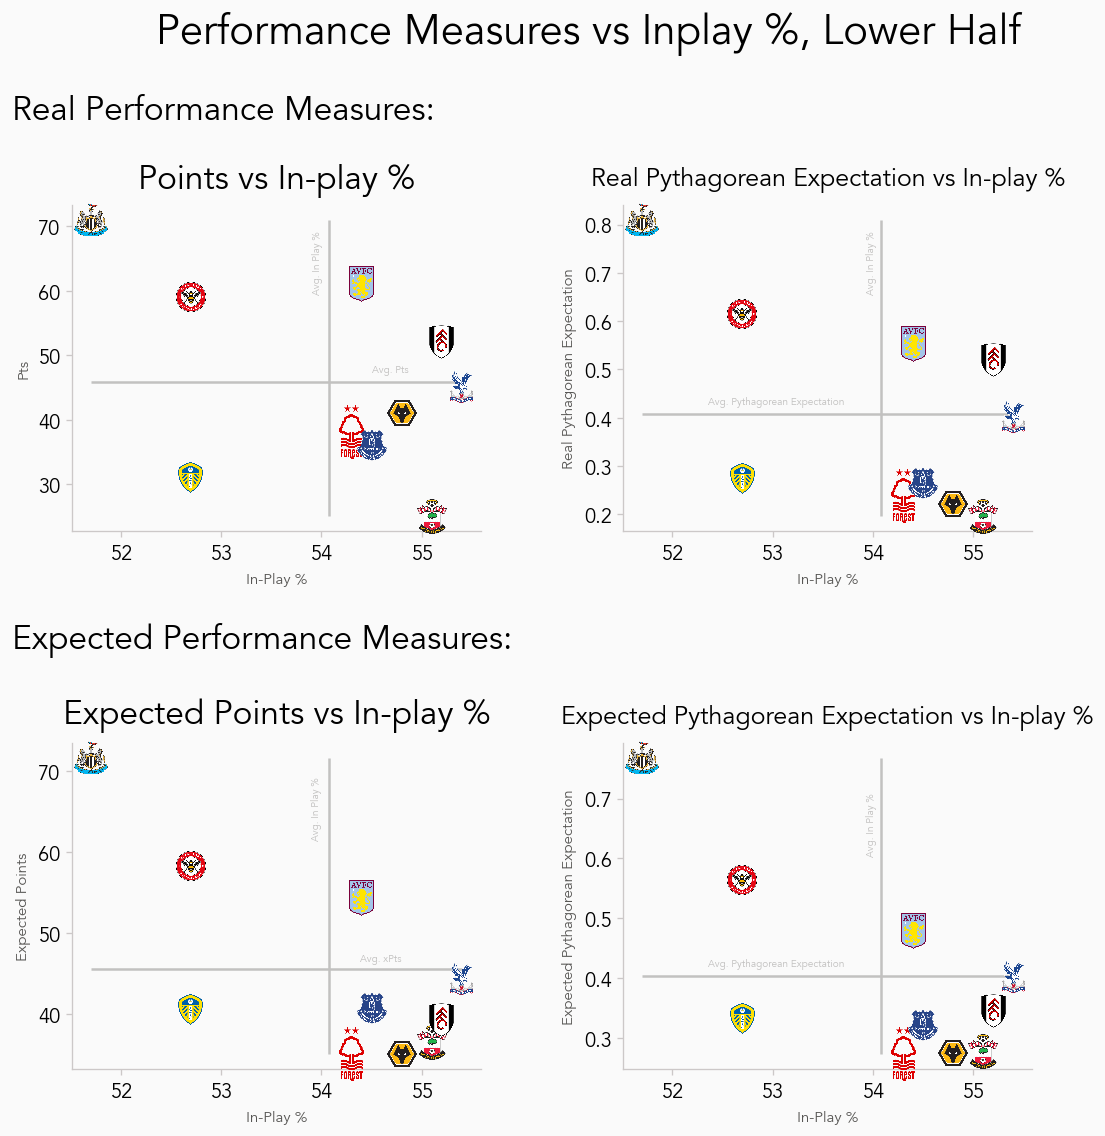

In [25]:
# Create initial plot
fig, axs = plt.subplots(2,2,figsize=(10, 9), dpi=120)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.35,
                    hspace=0.65)
fig.set_facecolor(bgcol)
axs[0,0].set_facecolor(bgcol)
axs[0,0].scatter(df6['total'], df6['Pts'], c=bgcol)

# Change plot spines
axs[0,0].spines['right'].set_visible(False)
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['left'].set_color('#ccc8c8')
axs[0,0].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[0,0].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[0,0].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df6.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['Pts']), frameon=False)
    axs[0,0].add_artist(ab)

# Add average lines
axs[0,0].hlines(df6['Pts'].mean(), df6['total'].min(), df6['total'].max(), color='#c2c1c0')
axs[0,0].vlines(df6['total'].mean(), df6['Pts'].min(), df6['Pts'].max(), color='#c2c1c0')

# Text

## Title
fig.text(.17,1.05,'Performance Measures vs Inplay %, Lower Half',size=25)

## Sub-title
fig.text(.05,.98,'Real Performance Measures:',size=20)

## Title & comment
axs[0,0].set_title('Points vs In-play %',fontsize=20, pad=10)

## Axes titles
axs[0,0].set_ylabel('Pts', size=9, color='#575654',rotation=90)
axs[0,0].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.35,.745,'Avg. Pts', size=6, color='#c2c1c0')
fig.text(.3,.82,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

# Create initial plot
axs[0,1].set_facecolor(bgcol)
axs[0,1].scatter(df6['total'], df6['RPE'], c=bgcol)

# Change plot spines
axs[0,1].spines['right'].set_visible(False)
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['left'].set_color('#ccc8c8')
axs[0,1].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[0,1].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[0,1].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df6.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['RPE']), frameon=False)
    axs[0,1].add_artist(ab)

# Add average lines
axs[0,1].hlines(df6['RPE'].mean(), df6['total'].min(), df6['total'].max(), color='#c2c1c0')
axs[0,1].vlines(df6['total'].mean(), df6['RPE'].min(), df6['RPE'].max(), color='#c2c1c0')

# Text

## Title & comment
axs[0,1].set_title('Real Pythagorean Expectation vs In-play %',fontsize=15, pad=12)

## Axes titles
axs[0,1].set_ylabel('Real Pythagorean Expectation', size=9, color='#575654',rotation=90)
axs[0,1].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.63,.716,'Avg. Pythagorean Expectation', size=6, color='#c2c1c0')
fig.text(.762,.82,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

# Create initial plot
axs[1,0].set_facecolor(bgcol)
axs[1,0].scatter(df6['total'], df6['xPts'], c=bgcol)

# Change plot spines
axs[1,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['left'].set_color('#ccc8c8')
axs[1,0].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[1,0].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[1,0].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df6.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['xPts']), frameon=False)
    axs[1,0].add_artist(ab)

# Add average lines
axs[1,0].hlines(df6['xPts'].mean(), df6['total'].min(), df6['total'].max(), color='#c2c1c0')
axs[1,0].vlines(df6['total'].mean(), df6['xPts'].min(), df6['xPts'].max(), color='#c2c1c0')

# Text

## Sub-title
fig.text(.05,0.49,'Expected Performance Measures:',size=20)

## Title & comment
axs[1,0].set_title('Expected Points vs In-play %',fontsize=20, pad=12)

## Axes titles
axs[1,0].set_ylabel('Expected Points', size=9, color='#575654',rotation=90)
axs[1,0].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.34,.2,'Avg. xPts', size=6, color='#c2c1c0')
fig.text(.299,.315,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

# Create initial plot
axs[1,1].set_facecolor(bgcol)
axs[1,1].scatter(df6['total'], df6['EPE'], c=bgcol)

# Change plot spines
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['left'].set_color('#ccc8c8')
axs[1,1].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[1,1].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[1,1].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df6.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['EPE']), frameon=False)
    axs[1,1].add_artist(ab)

# Add average lines
axs[1,1].hlines(df6['EPE'].mean(), df6['total'].min(), df6['total'].max(), color='#c2c1c0')
axs[1,1].vlines(df6['total'].mean(), df6['EPE'].min(), df6['EPE'].max(), color='#c2c1c0')

# Text

## Title & comment
axs[1,1].set_title('Expected Pythagorean Expectation vs In-play %',fontsize=15, pad =12)

## Axes titles
axs[1,1].set_ylabel('Expected Pythagorean Expectation', size=9, color='#575654',rotation=90)
axs[1,1].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.63,.195,'Avg. Pythagorean Expectation', size=6, color='#c2c1c0')
fig.text(.762,.3,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

plt.show()

As expected we see the clear downward trends in all 4 plots, however I don't think that is it and we have finished with this bit of it. Akin to the section with non big 6 teams we see that yet again Newcastle United are far and away different from all the other teams in this subset. I'm not going to repeat it all again but you can see how if I were to remove Newcastle again we would end up with similar coefficients and plots and therefore in both cases it seems that Newcastle are an outlier. Again for this section then, I would conclude that among the other 9 teams in play % is not a good indicator of performance and it is statistically possible to play well with high in-play % and vice-versa and all other permutations.

---

## Analysis and Visualisations, After Second Subsetting - Upper Half

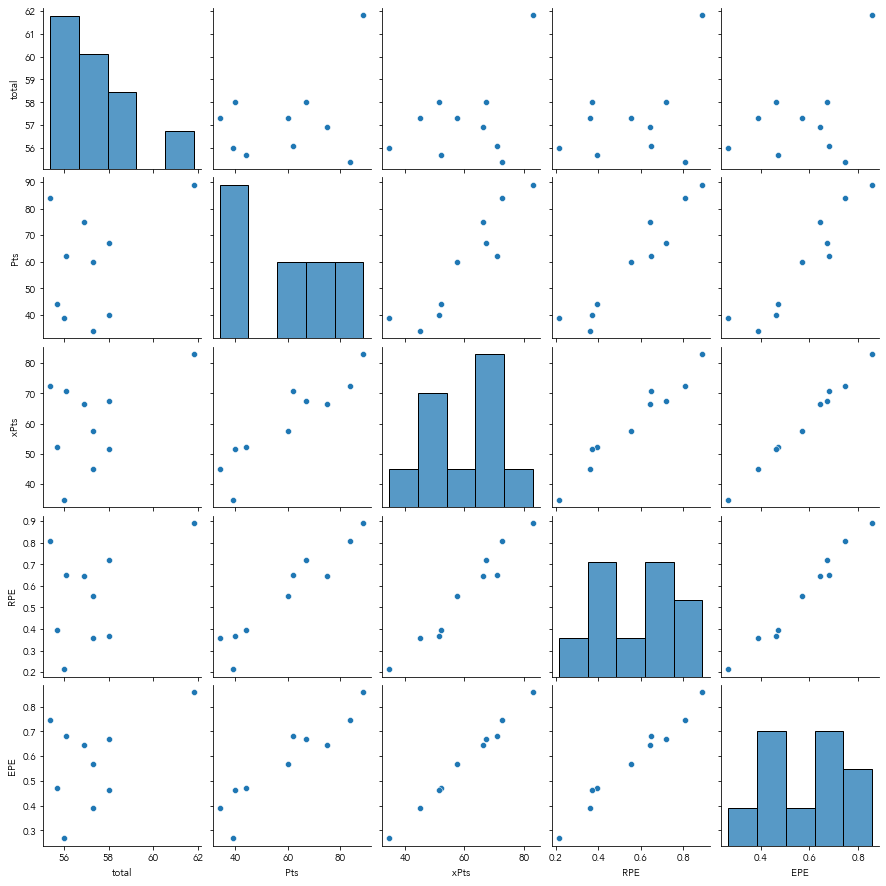

In [26]:
sns.pairplot(df7)
plt.show()

In [27]:
df7.corr()

,total,Pts,xPts,RPE,EPE
total,1.000000,0.368168,0.451210,0.429245,0.454752
Pts,0.368168,1.000000,0.916102,0.954407,0.933147
xPts,0.451210,0.916102,1.000000,0.975904,0.996688
RPE,0.429245,0.954407,0.975904,1.000000,0.987203
EPE,0.454752,0.933147,0.996688,0.987203,1.000000


As postulated before, in this subset with the teams of higher in play %, it is positively correlated with all of the performance measures. Not with very large absolute values, but large enough to think you should see a trend.

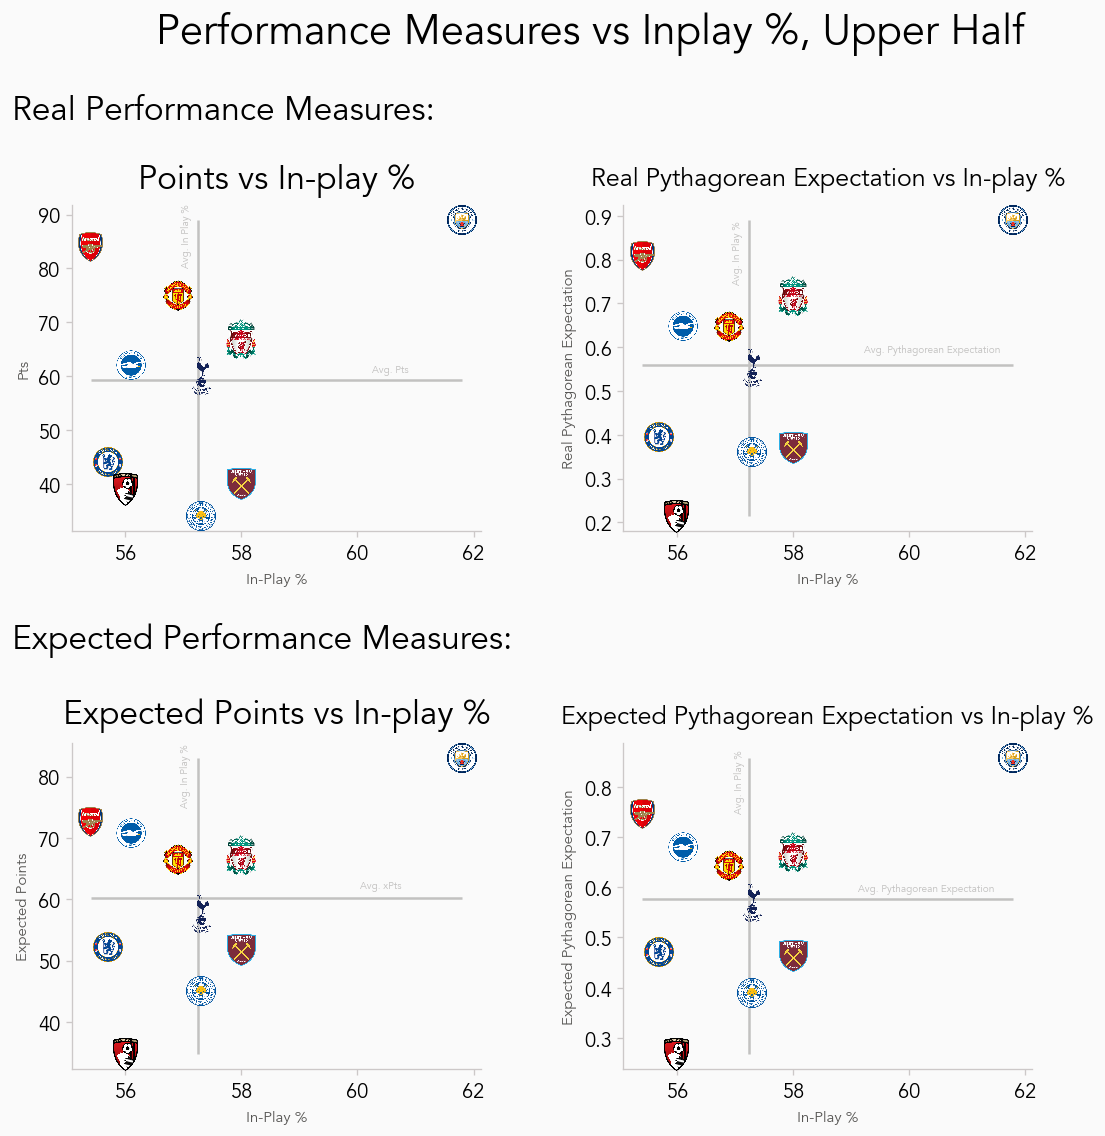

In [28]:
# Create initial plot
fig, axs = plt.subplots(2,2,figsize=(10, 9), dpi=120)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.35,
                    hspace=0.65)
fig.set_facecolor(bgcol)
axs[0,0].set_facecolor(bgcol)
axs[0,0].scatter(df7['total'], df7['Pts'], c=bgcol)

# Change plot spines
axs[0,0].spines['right'].set_visible(False)
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['left'].set_color('#ccc8c8')
axs[0,0].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[0,0].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[0,0].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df7.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['Pts']), frameon=False)
    axs[0,0].add_artist(ab)

# Add average lines
axs[0,0].hlines(df7['Pts'].mean(), df7['total'].min(), df7['total'].max(), color='#c2c1c0')
axs[0,0].vlines(df7['total'].mean(), df7['Pts'].min(), df7['Pts'].max(), color='#c2c1c0')

# Text

## Title
fig.text(.17,1.05,'Performance Measures vs Inplay %, Upper Half',size=25)

## Sub-title
fig.text(.05,.98,'Real Performance Measures:',size=20)

## Title & comment
axs[0,0].set_title('Points vs In-play %',fontsize=20, pad=10)

## Axes titles
axs[0,0].set_ylabel('Pts', size=9, color='#575654',rotation=90)
axs[0,0].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.35,.745,'Avg. Pts', size=6, color='#c2c1c0')
fig.text(.191,.845,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

# Create initial plot
axs[0,1].set_facecolor(bgcol)
axs[0,1].scatter(df7['total'], df7['RPE'], c=bgcol)

# Change plot spines
axs[0,1].spines['right'].set_visible(False)
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['left'].set_color('#ccc8c8')
axs[0,1].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[0,1].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[0,1].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df7.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['RPE']), frameon=False)
    axs[0,1].add_artist(ab)

# Add average lines
axs[0,1].hlines(df7['RPE'].mean(), df7['total'].min(), df7['total'].max(), color='#c2c1c0')
axs[0,1].vlines(df7['total'].mean(), df7['RPE'].min(), df7['RPE'].max(), color='#c2c1c0')

# Text

## Title & comment
axs[0,1].set_title('Real Pythagorean Expectation vs In-play %',fontsize=15, pad=12)

## Axes titles
axs[0,1].set_ylabel('Real Pythagorean Expectation', size=9, color='#575654',rotation=90)
axs[0,1].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.76,.764,'Avg. Pythagorean Expectation', size=6, color='#c2c1c0')
fig.text(.65,.83,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

# Create initial plot
axs[1,0].set_facecolor(bgcol)
axs[1,0].scatter(df7['total'], df7['xPts'], c=bgcol)

# Change plot spines
axs[1,0].spines['right'].set_visible(False)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['left'].set_color('#ccc8c8')
axs[1,0].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[1,0].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[1,0].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df7.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['xPts']), frameon=False)
    axs[1,0].add_artist(ab)

# Add average lines
axs[1,0].hlines(df7['xPts'].mean(), df7['total'].min(), df7['total'].max(), color='#c2c1c0')
axs[1,0].vlines(df7['total'].mean(), df7['xPts'].min(), df7['xPts'].max(), color='#c2c1c0')

# Text

## Sub-title
fig.text(.05,0.49,'Expected Performance Measures:',size=20)

## Title & comment
axs[1,0].set_title('Expected Points vs In-play %',fontsize=20, pad=12)

## Axes titles
axs[1,0].set_ylabel('Expected Points', size=9, color='#575654',rotation=90)
axs[1,0].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.34,.268,'Avg. xPts', size=6, color='#c2c1c0')
fig.text(.19,.345,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

# Create initial plot
axs[1,1].set_facecolor(bgcol)
axs[1,1].scatter(df7['total'], df7['EPE'], c=bgcol)

# Change plot spines
axs[1,1].spines['right'].set_visible(False)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['left'].set_color('#ccc8c8')
axs[1,1].spines['bottom'].set_color('#ccc8c8')

# Change ticks
axs[1,1].tick_params(axis='x', labelsize=12, color='#ccc8c8')
axs[1,1].tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)

for index, row in df7.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total'], row['EPE']), frameon=False)
    axs[1,1].add_artist(ab)

# Add average lines
axs[1,1].hlines(df7['EPE'].mean(), df7['total'].min(), df7['total'].max(), color='#c2c1c0')
axs[1,1].vlines(df7['total'].mean(), df7['EPE'].min(), df7['EPE'].max(), color='#c2c1c0')

# Text

## Title & comment
axs[1,1].set_title('Expected Pythagorean Expectation vs In-play %',fontsize=15, pad =12)

## Axes titles
axs[1,1].set_ylabel('Expected Pythagorean Expectation', size=9, color='#575654',rotation=90)
axs[1,1].set_xlabel('In-Play %', size=9, color='#575654')

## Avg line explanation
fig.text(.755,.265,'Avg. Pythagorean Expectation', size=6, color='#c2c1c0')
fig.text(.652,.34,'Avg. In Play %', size=6, color='#c2c1c0',rotation=90)

plt.show()

Again we see the trends we were expecting, and again we see how one team skews it to be like that. Like in the big 6 section, the team is Manchester City but unlike when we split the data based on big 6, we now have 2 data sets of equal size. This means we can apply the same procedure and logic as we did above with Newcastle which leads us to the same conclusion. Namely, City is seemingly an outlier and when ignored we are left with another 9 teams that demonstrate there is no significant link between in play % and performance. Furthermore, going all the way back to the top, you could see how ignoring City and Newcastle in the first visuals leaves you with 18 teams that show no correlation.

This is the end of the last section using these tools and visuals and the next bit will focus on regression analysis and using hypothesis tests to again show whether or not in play % is a statistically significant variable in performance.

---

## Regression Analysis - Complete Data Set

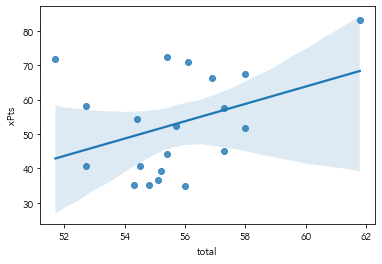

In [29]:
sns.regplot(x="total", y="xPts", data = df1)
plt.show()

Above is an example of a regression plot using the complete data set and looking at the relationship between Points and in play % - I will not be producing any more of these because they will be similar to the plots above and hence not add much more. Additionally, I will be looking at the linear regressions on all 4 relationships for each data set that's been created. So that's 4 plots for 7 data sets so 28 altogether and that again will be too much. However, to see any of the linear regressions visualised all that's required is to change the $y$ variable to any of the 4 performance measures and change the $data$ variable to any of the data sets. We will now proceed to do all of the linear regressions, which despite still being a lot will be less messy and take up a lot less space.

In [30]:
lm_11 = smf.ols(formula = 'Pts ~ total', data=df1).fit()
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     2.221
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.153
Time:                        19:41:29   Log-Likelihood:                -84.720
No. Observations:                  20   AIC:                             173.4
Df Residuals:                      18   BIC:                             175.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -97.2003    100.637     -0.966      0.3

In [31]:
lm_12 = smf.ols(formula = 'RPE ~ total', data=df1).fit()
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    RPE   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.506
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.235
Time:                        19:41:29   Log-Likelihood:                 3.0805
No. Observations:                  20   AIC:                            -2.161
Df Residuals:                      18   BIC:                           -0.1696
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0463      1.248     -0.838      0.4

In [32]:
lm_13 = smf.ols(formula = 'xPts ~ total', data=df1).fit()
print(lm_13.summary())

                            OLS Regression Results                            
Dep. Variable:                   xPts   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     2.966
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.102
Time:                        19:41:29   Log-Likelihood:                -80.507
No. Observations:                  20   AIC:                             165.0
Df Residuals:                      18   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -87.4327     81.522     -1.073      0.2

In [33]:
lm_14 = smf.ols(formula = 'EPE ~ total', data=df1).fit()
print(lm_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    EPE   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     2.459
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.134
Time:                        19:41:29   Log-Likelihood:                 6.9396
No. Observations:                  20   AIC:                            -9.879
Df Residuals:                      18   BIC:                            -7.888
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1230      1.029     -1.091      0.2

---

What I've done above is created 4 linear models on the whole data set using in play % as the independent variable and each performance measure as the dependent variable. After creating each model, I have printed the summary of it which includes lots of information and statistics to do with the model. 

The key bit for us is looking at the table of variables and their coefficients. The coefficients correspond to the "impact" of that variable in a numerical sense, so for example in the first one $total$ has a coefficient of 2.692 meaning that for every unit increase in $total$, an extra 1% of the ball being in play, your average expected increase in points is 2.692. However, the most important value is found in the row labelled $total$ and the $P>|t|$ column. This value is called a p-value and is used in hypothesis tests as the value that determines whether you reject the null hypothesis or not. In this test, the null hypothesis is that the null model, the model with simply the intercept variable, is sufficient to capture the trend in the data (aka there isn't one) and that adding the variable $total$ doesn't significantly improve the model (aka is not significantly linked with the dependant variable). Notably, in all 4 models this value is above 0.1 and would be insufficient evidence at any common significance level (10%,5%,2.5%,etc) to reject the null hypothesis. This means that in this dataset, in play % is not a statistically significant variable in any of the performance measures and therefore performance overall.

What we will proceed to now, just like in the visual analysis, is repeat this with the subsetted data sets created above and see what we find.

---

## Regression Analysis - Big 6

In [34]:
lm_21 = smf.ols(formula = 'Pts ~ total', data=df3).fit()
print(lm_21.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     1.369
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.307
Time:                        19:41:29   Log-Likelihood:                -23.916
No. Observations:                   6   AIC:                             51.83
Df Residuals:                       4   BIC:                             51.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -137.6103    177.434     -0.776      0.4

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [35]:
lm_22 = smf.ols(formula = 'RPE ~ total', data=df3).fit()
print(lm_22.summary())

                            OLS Regression Results                            
Dep. Variable:                    RPE   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     2.116
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.219
Time:                        19:41:29   Log-Likelihood:                 3.6420
No. Observations:                   6   AIC:                            -3.284
Df Residuals:                       4   BIC:                            -3.701
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9426      1.796     -1.082      0.3

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [36]:
lm_23 = smf.ols(formula = 'xPts ~ total', data=df3).fit()
print(lm_23.summary())

                            OLS Regression Results                            
Dep. Variable:                   xPts   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     3.545
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.133
Time:                        19:41:29   Log-Likelihood:                -20.386
No. Observations:                   6   AIC:                             44.77
Df Residuals:                       4   BIC:                             44.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -118.8128     98.513     -1.206      0.2

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [37]:
lm_24 = smf.ols(formula = 'EPE ~ total', data=df3).fit()
print(lm_24.summary())

                            OLS Regression Results                            
Dep. Variable:                    EPE   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     3.238
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.146
Time:                        19:41:29   Log-Likelihood:                 5.8377
No. Observations:                   6   AIC:                            -7.675
Df Residuals:                       4   BIC:                            -8.092
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5806      1.246     -1.269      0.2

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


---

Again we find that all 4 of these p-values are above 0.1, so we simply come to the same conclusions as above. In the context of this subset this means that among the premier league teams known as the "Big 6" in play % is not a statistically significant variable in any of the performance measures and therefore performance overall.

---

## Regression Analysis - non Big 6

In [38]:
lm_31 = smf.ols(formula = 'Pts ~ total', data=df2).fit()
print(lm_31.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1.896
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.194
Time:                        19:41:29   Log-Likelihood:                -54.815
No. Observations:                  14   AIC:                             113.6
Df Residuals:                      12   BIC:                             114.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    203.7515    115.124      1.770      0.1

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [39]:
lm_32 = smf.ols(formula = 'RPE ~ total', data=df2).fit()
print(lm_32.summary())

                            OLS Regression Results                            
Dep. Variable:                    RPE   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1.659
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.222
Time:                        19:41:29   Log-Likelihood:                 4.6044
No. Observations:                  14   AIC:                            -5.209
Df Residuals:                      12   BIC:                            -3.931
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5316      1.652      1.533      0.1

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [40]:
lm_33 = smf.ols(formula = 'xPts ~ total', data=df2).fit()
print(lm_33.summary())

                            OLS Regression Results                            
Dep. Variable:                   xPts   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.6236
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.445
Time:                        19:41:29   Log-Likelihood:                -54.520
No. Observations:                  14   AIC:                             113.0
Df Residuals:                      12   BIC:                             114.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    135.9687    112.729      1.206      0.2

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [41]:
lm_34 = smf.ols(formula = 'EPE ~ total', data=df2).fit()
print(lm_34.summary())

                            OLS Regression Results                            
Dep. Variable:                    EPE   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9831
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.341
Time:                        19:41:29   Log-Likelihood:                 6.9993
No. Observations:                  14   AIC:                            -9.999
Df Residuals:                      12   BIC:                            -8.721
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7960      1.392      1.290      0.2

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


---

Yet again we see the same story. Without repeating myself, we come to the same conclusions again in regards to the other 14 premier league teams.

---

## Regression Analysis - non Big 6 w/o Newcastle

In [42]:
lm_41 = smf.ols(formula = 'Pts ~ total', data=df4).fit()
print(lm_41.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.076
Method:                 Least Squares   F-statistic:                    0.1478
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.708
Time:                        19:41:29   Log-Likelihood:                -49.947
No. Observations:                  13   AIC:                             103.9
Df Residuals:                      11   BIC:                             105.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     92.1905    127.206      0.725      0.4

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [43]:
lm_42 = smf.ols(formula = 'RPE ~ total', data=df4).fit()
print(lm_42.summary())

                            OLS Regression Results                            
Dep. Variable:                    RPE   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.089
Method:                 Least Squares   F-statistic:                   0.02314
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.882
Time:                        19:41:29   Log-Likelihood:                 5.9029
No. Observations:                  13   AIC:                            -7.806
Df Residuals:                      11   BIC:                            -6.676
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6378      1.733      0.368      0.7

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [44]:
lm_43 = smf.ols(formula = 'xPts ~ total', data=df4).fit()
print(lm_43.summary())

                            OLS Regression Results                            
Dep. Variable:                   xPts   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.079
Method:                 Least Squares   F-statistic:                    0.1207
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.735
Time:                        19:41:29   Log-Likelihood:                -48.905
No. Observations:                  13   AIC:                             101.8
Df Residuals:                      11   BIC:                             102.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3228    117.403      0.037      0.9

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [45]:
lm_44 = smf.ols(formula = 'EPE ~ total', data=df4).fit()
print(lm_44.summary())

                            OLS Regression Results                            
Dep. Variable:                    EPE   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.082
Method:                 Least Squares   F-statistic:                   0.09565
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.763
Time:                        19:41:29   Log-Likelihood:                 8.9619
No. Observations:                  13   AIC:                            -13.92
Df Residuals:                      11   BIC:                            -12.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0339      1.369     -0.025      0.9

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


---

Unsurprisingly, as this was the plot that had the least clear trend, what we see in this subset is just what we've already seen.

---

## Regression Analysis - Half and Half, Lower Half

In [46]:
lm_51 = smf.ols(formula = 'Pts ~ total', data=df6).fit()
print(lm_51.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     2.244
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.173
Time:                        19:41:29   Log-Likelihood:                -39.217
No. Observations:                  10   AIC:                             82.43
Df Residuals:                       8   BIC:                             83.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    337.9230    194.989      1.733      0.1

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [47]:
lm_52 = smf.ols(formula = 'RPE ~ total', data=df6).fit()
print(lm_52.summary())

                            OLS Regression Results                            
Dep. Variable:                    RPE   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     3.913
Date:                Wed, 04 Oct 2023   Prob (F-statistic):             0.0833
Time:                        19:41:29   Log-Likelihood:                 4.1024
No. Observations:                  10   AIC:                            -4.205
Df Residuals:                       8   BIC:                            -3.600
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4767      2.563      2.137      0.0

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [48]:
lm_53 = smf.ols(formula = 'xPts ~ total', data=df6).fit()
print(lm_53.summary())

                            OLS Regression Results                            
Dep. Variable:                   xPts   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     9.016
Date:                Wed, 04 Oct 2023   Prob (F-statistic):             0.0170
Time:                        19:41:29   Log-Likelihood:                -34.811
No. Observations:                  10   AIC:                             73.62
Df Residuals:                       8   BIC:                             74.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    422.3193    125.508      3.365      0.0

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [49]:
lm_54 = smf.ols(formula = 'EPE ~ total', data=df6).fit()
print(lm_54.summary())

                            OLS Regression Results                            
Dep. Variable:                    EPE   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     9.094
Date:                Wed, 04 Oct 2023   Prob (F-statistic):             0.0167
Time:                        19:41:29   Log-Likelihood:                 8.4788
No. Observations:                  10   AIC:                            -12.96
Df Residuals:                       8   BIC:                            -12.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3905      1.654      3.258      0.0

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


---

For the first time, here we see p-values that are below the common significance levels - not just 10%, but 5% and 2.5% as well. To go through each one, it says that in play % is a statistically significant variable in real pythagorean expectation (RPE), expected pythagorean expectation (EPE) and expected points (xPts), but not a statistically significant variable in points. To be even more specific, this is among clubs that have an average in play % in the bottom half. The inference, therefore, is that if you are a club that tends to have a lower in play % you should try and __reduce__ that even more as statistically it increases these metrics. It is also worth noting that these metrics are more defining than purely points, certainly to football analysts, as they tend to suggest more about underlying performance rather than just results.

So this is very interesting, because until this point we've seen the same story every time and you might just expect that to carry on and be left with a fairly simple conclusion. So why is it not like that now? Again there is more thought to be done and again I am drawn to the problematic data point of Newcastle United. Earlier, when we considered this issue we chose to designate it an outlier and just proceed with the data left over to see what we found. I don't think we can do that here as when we did it originally, it was simply a biased decision about the data to see the pattern we thought was there. This is not very statistical. Now we have a clear model, precise values and procedures to reach certain conclusions. Even further to the discussion of outliers earlier, there are statistics we can look at that give us information about these problematic data points. We can assign a value, namely the cook's distance, to the newcastle united data point and decide whether it is a __statistical__ outlier or simply an outlier as designated earlier, which is what we will do now.

---

In [50]:
np.where(df6['Team']=='Newcastle United')

(array([0]),)

In [51]:
influence = lm_52.get_influence()
cooks = influence.cooks_distance
print("The Cook's distance for the Newcastle United data point is",cooks[0][0])

The Cook's distance for the Newcastle United data point is 0.9491573790611452


In [52]:
influence = lm_53.get_influence()
cooks = influence.cooks_distance
print("The Cook's distance for the Newcastle United data point is",cooks[0][0])

The Cook's distance for the Newcastle United data point is 1.1373574321573576


In [53]:
influence = lm_54.get_influence()
cooks = influence.cooks_distance
print("The Cook's distance for the Newcastle United data point is",cooks[0][0])

The Cook's distance for the Newcastle United data point is 1.5200339605301432


---

As a rule of thumb any point with a Cook's distance larger than $4/n$ is considered highly influential and a statistical outlier (not exactly but let's just say that for simplicity). There are 10 observations in the data set so our critical value is 0.4 and any value above that is significant, therefore clearly Newcastle United can be considered a statistical outlier in each of the 3 models where we found $total$ to be a significant variable. Now that we have shown that, what next? Well let's just do the same as what we did when we decided it was an outlier as we now have the required justification for this - remove it from the data and redo the analysis.

---

In [54]:
df8 = df6.drop(14)
df8

,Team,total,Pts,xPts,RPE,EPE,path
9,Leeds United,52.7,31,40.58,0.274678,0.332233,Leeds United.png
3,Brentford,52.7,59,58.26,0.613869,0.564398,Brentford.png
15,Nottingham Forest,54.3,38,35.05,0.237970,0.272583,Nottingham Forest.png
1,Aston Villa,54.4,61,54.37,0.551410,0.477616,Aston Villa.png
7,Everton,54.5,36,40.71,0.262429,0.321256,Everton.png
19,Wolves,54.8,41,35.01,0.222197,0.274013,Wolves.png
16,Southampton,55.1,25,36.47,0.195623,0.276392,Southampton.png
8,Fulham,55.2,52,39.24,0.518512,0.343994,Fulham.png
6,Crystal Palace,55.4,45,44.24,0.399900,0.400324,Crystal Palace.png


In [55]:
lm_61 = smf.ols(formula = 'Pts ~ total', data=df8).fit()
print(lm_61.summary())

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.128
Method:                 Least Squares   F-statistic:                   0.09020
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.773
Time:                        19:41:29   Log-Likelihood:                -34.771
No. Observations:                   9   AIC:                             73.54
Df Residuals:                       7   BIC:                             73.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    118.2317    250.159      0.473      0.6

In [56]:
lm_62 = smf.ols(formula = 'RPE ~ total', data=df8).fit()
print(lm_62.summary())

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                    RPE   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                 -0.087
Method:                 Least Squares   F-statistic:                    0.3625
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.566
Time:                        19:41:29   Log-Likelihood:                 4.4678
No. Observations:                   9   AIC:                            -4.936
Df Residuals:                       7   BIC:                            -4.541
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2887      3.197      0.716      0.4

In [57]:
lm_63 = smf.ols(formula = 'xPts ~ total', data=df8).fit()
print(lm_63.summary())

                            OLS Regression Results                            
Dep. Variable:                   xPts   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1.898
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.211
Time:                        19:41:29   Log-Likelihood:                -30.259
No. Observations:                   9   AIC:                             64.52
Df Residuals:                       7   BIC:                             64.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    251.3997    151.524      1.659      0.1

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [58]:
lm_64 = smf.ols(formula = 'EPE ~ total', data=df8).fit()
print(lm_64.summary())

                            OLS Regression Results                            
Dep. Variable:                    EPE   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     1.708
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.232
Time:                        19:41:29   Log-Likelihood:                 9.3690
No. Observations:                   9   AIC:                            -14.74
Df Residuals:                       7   BIC:                            -14.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7861      1.855      1.502      0.1

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


---

And just like that we see what we have been seeing the whole time. So what do we conclude from this? Well we can now say again that, among clubs that have an inplay % in the lower half (disregarding any outliers), in play % is not a statistically significant variable in any of the performance measures and therefore performance overall. Now onto the final little bit and then we will sum up and conclude.

---

## Regression Analysis - Half and Half, Upper Half

In [59]:
lm_71 = smf.ols(formula = 'Pts ~ total', data=df7).fit()
print(lm_71.summary())

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.254
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.295
Time:                        19:41:29   Log-Likelihood:                -42.700
No. Observations:                  10   AIC:                             89.40
Df Residuals:                       8   BIC:                             90.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -164.6339    200.123     -0.823      0.4

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [60]:
lm_72 = smf.ols(formula = 'RPE ~ total', data=df7).fit()
print(lm_72.summary())

                            OLS Regression Results                            
Dep. Variable:                    RPE   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     1.807
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.216
Time:                        19:41:29   Log-Likelihood:                 2.5126
No. Observations:                  10   AIC:                            -1.025
Df Residuals:                       8   BIC:                           -0.4200
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3644      2.176     -1.086      0.3

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [61]:
lm_73 = smf.ols(formula = 'xPts ~ total', data=df7).fit()
print(lm_73.summary())

                            OLS Regression Results                            
Dep. Variable:                   xPts   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     2.045
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.191
Time:                        19:41:29   Log-Likelihood:                -39.281
No. Observations:                  10   AIC:                             82.56
Df Residuals:                       8   BIC:                             83.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -143.0712    142.173     -1.006      0.3

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [62]:
lm_74 = smf.ols(formula = 'EPE ~ total', data=df7).fit()
print(lm_74.summary())

                            OLS Regression Results                            
Dep. Variable:                    EPE   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     2.086
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.187
Time:                        19:41:29   Log-Likelihood:                 4.7320
No. Observations:                  10   AIC:                            -5.464
Df Residuals:                       8   BIC:                            -4.859
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9408      1.743     -1.113      0.2

/Users/samgrant/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


---

Finally, and thankfully for my sanity, in this final subset of data including the teams with an inplay % in the upper half none of the values of interest are below our significance levels and we find the same conclusion as above. Namely that among clubs that have an inplay % in the upper half, it is not a statistically significant variable in any of the performance measures and therefore performance overall.

---

# Conclusion

This, my first individual project, has been very interesting to me. Before I started it I had certain ideas about what I thought I would find and deduce and as I started working through it I quickly realised that what I thought before was the opposite of what I was finding. But then, it seemed to revert back to the ideas I originally thought. And then again, it switched to the opposite. This happened multiple times throughout and that is all very vague and non-descript but the point is I learnt a very valuable lesson doing this report and that lesson is that whatever ideas you have before you start working through it, whether they are right or wrong, do not change the conclusions that actually emerge from it. That sounds obvious but it is crucial to remember this idea because it is a dangerous mentality of assuming beforehand what you will see. Early on, I found that when the emerging pattern differed from my pre-conceived thoughts I would stop and pause and try and think of how to force the pattern I wanted from the data or the analysis or whatever it was. You cannot do this in a statistical analysis. And I think it is too easy in this data-rich modern world to pick and choose what to present and which bits to keep to show whatever point you want to show, an obviously dangerous notion. I believe the best statisticians, something I hope to maybe be one day, take a purely objective view and simply allow whatever patterns there are (or lack of patterns) to show themselves. They try to remove all bias because bias is the antithesis to statistics.

In regards to the details of the report I think it is fairly clear the conclusion that is made from all the evidence collected. That the amount of time a team spent with the ball in play had no significant impact on there performance across the 22/23 Premier League season. Subsequently, in response to questions addressed in the intro, it is not statistically worthwile implementing time wasting tactics as a significant element of a team's game. That is not to say they are useless, as clearly there are situations that logically suggest they would help on a micro level (eg a one goal lead late into a game) or on a larger scale (eg bottom of the table playing Manchester City). This is where issues mentioned in the first paragraph come from as I thought "logically" worst teams need to waste time and stop the better team having more of the ball to limit their threat, but as I believe I've shown this is not the case. The points in the report I thought I was seeing that pattern emerge was when the topic of outliers arose, in this case Newcastle United, as this team seemed to give rise to that pattern. But again, as it was shown, aside from them the pattern was not. So then, statistics aside, the question becomes how did they perform so well if it's not down to their time-wasting tactics? I don't want to dive too much into their tactics but I believe in that is the answer to the question. It is everything else. The style of play, the manager, the squad, the staff, all these factors made Newcastle the team they were last season, and it is too easy to see a figure with them having far less in play %, other teams complaining about their time wasting dark arts and concluding their results are down to that. That is what some people will do without looking any further and this is an example of confirmation bias, the thing statisticians aim to remove.

This idea is also seen looking at the top end of teams, specifically Manchester City, and thinking it is clear that playing with the ball in play more means you are likely to play better. I again believe I have shown this is false, and logically it is actually the other way round, that a top team like City has developed a very successful and proven style of play, producing consistently outstanding performances, and this style of play tends to having the ball in play more. It is all about looking a little bit closer, with no thoughts about what you __should__ see.

And so this conclusion concludes my first project. I also did not think it would go into much detail before I started, which was a sore mistake as I kept finding more bits to add and talk about making it more difficult to progress with and finish - it felt like it wouldn't end. At some point, I had to almost say right this is the end point finish the section you're doing and that will be that. I hope that as I complete more similar projects, assigned or otherwise, I will learn better how to keep focused on the goal I started with and not spiral out into continually adding things to do rather than completing them. Simple maths dictates it would indeed not get finished. I would also welcome more statistical additions to this project because I know especially when it came to the discussion on outliers it was not really rigorous enough, but in relation to reasons just mentioned I couldn't go into an even more in-depth discussion and analysis. I needed it to be finished so I could move on to my other ambitions in football analysis - other projects and obtaining experience and qualifications - and also other important aspects of my life - uni life, uni work and post graduate planning. If you've made it this far I hope it was somewhat enjoyable and interesting to you, and if not, my apologies I suppose.

---

#### Last edited 4/10/23